## Create data set and topic modeling by Xiaohui (Eartha) Guo



In [84]:
import collections, re
import string
from collections import Counter
import numpy as np
import pandas as pd
import math
from numpy.linalg import inv
import csv
from sklearn.preprocessing import normalize
import enchant



In [85]:
d1 = "The Godfather is pretty much flawless, and one of the greatest films ever made Rather than concentrating on everything that is great about The Godfather, a much easier way for me to judge its quality is on what is bad about it. Almost every film has something that I don't like about it, but I can honestly say that I wouldn't change anything about The Godfather. There is nothing weak about it and nothing that stands out as bad. That's why it gets ten out of ten.This is one of those films that made me wonder why I hadn't seen it earlier. The acting from everyone involved is great, Marlon Brando comes across perfectly as the head of the family, and James Caan and Al Pacino are excellent as his sons. The soundtrack by Nino Rota is also very memorable, bringing back memories of the film every time I hear it. The plot has to be excellent for it to get ten out of ten, and it is, it's far from predictable and the film is the definition of a great epic. The film is pretty shocking in the way every death occurs almost instantaneously, and as it spans ten years so many different things happen and every minute of it is great entertainment. It's a well-made and entertaining film that is only the first part of a trilogy, but it stands on its own as a wonderful film in its own right. If you haven not seen it, what are you waiting for? This was one acclaimed film that did not disappoint."
d2 = "Magnificent portrait of organized crime. This is by far the best movie ever to give a portrait organized crime, this movie goes deep inside and shows it all inside out..With superb acting by especially Al Pacino as Mike Corleone and Marlon Brando as Don Vito corleone this movie shows how one of the head mafia families in New York works, it gives a detailed picture of how their business runs and what kinda chances they got to take on their business, for example their denial to step inside the narcotic business brings on alot of troubles, but also it shows what kinda sacrifices they make, every day could be their last day..Al Pacino shines above all in this movie, as the smart boy of the family he returns after fighting a war for his country, at that time not involved in the family business, but it doesn't take long before the war breaks lose and he see no other ways than to step in and fight for his family. This is definetely a must see masterpiece."
d3 = "This movie is strong, good script, great casting, excellent acting, and over the top directing. It is hard to fine a movie done this well, it is 29 years old and has aged well. Even if the viewer does not like mafia type of movies, he or she will watch the entire film, the audiences is glued to what will happen next as the film progresses. Its about, family, loyalty, greed, relationships, and real life. This is a great mix, and the artistic style make the film memorable."
d4 = "The Greatest Movie Ever Made The Godfather is one of the very few films that doesn't have a single flaw. Seeing The Godfather for the first time was the most amazing movie experiences of my life. There's scenes that stay with you when the movies over, and you don't forget them. Everyone makes the mistake of calling this film a movie about crime. Its really a movie about family. The dialogue is just unbelievable. I've seen the movie at least 30, 40 times, and I'm still amazed at how perfect it is. The music, the acting, everything. People think that Citizen Kane is the greatest movie ever made...well, there's no way that ANYONE can think that Citizen Kane is more moving, and has a better storyline than The Godfather. The thing I find so amazing about The Godfather is how Michael (Al Pacino) changes throughout the movie. Its my opinion that this is the greatest movie ever made, and I doubt that anyone can watch this movie, and think I'm crazy."
d5 = "A Masterpiece This must rank as the best film (along with part 2)of all time.An ensemble performance that has no weak spot. Particularly, John Cazale ( Fredo) and Richard Castellano ( Clemenza) give wonderfully understated performances. You just have to believe that Castellano WAS Clemenza, he brings a real touch to his role. John Cazale brings the troubled Fredo to life, and you can see the weak Fredo desperately trying to live up to the family reputation but knowing that he can never be what his father wants.  The story of one man's reluctance to be drawn into the murky family business,and his gradual change through circumstance, paints a vivid picture of this violent period of US history. Do not miss this film"
d6 = "This Movie Has Haunted My Life I love this movie and all of the GF movies. I see something new every time I have seen it (countless, truly). The story of tragedy and (little) comedy that exists in this film is easily understood by people all over the world. This film has been called an American story however I have met others who have seen this movie in other languages and they seem to have the same love and appreciation for it that I do. I love the characters and all of the different personalities that they represent not just in families but in society itself. It seems like the entire cast is part of every other movie that I love as well. The sounds, music, color and light in the film are just as much a part of the film as the people. This could be attributed to the method in which it was filmed. At many parts of the film I can still find myself feeling the emotions conveyed in the film. I never tire of appreciating this film. I thank God that FFC is an American treasure. We are fortunate to have him."
d7 = "The Godfather Engrossing motion picture that features some of the finest editing, cinematography and performances ever. There is a wonderful theme of family that runs through this film and its later sequels. No one is truly judged. Love is unconditional. God is the one who truly judges. Easily, the word masterpiece describes this film, but that's been said by so many...Who am I to argue? Masterpiece is right on the money."
d8 = "The Greatest Film of All Time ! Period. This film contains all the elements of a genuine masterpiece. Its attention to detail, history, and tradition. An absolutely wonderful screenplay. Its comparative closeness to the novel and a storyline which became the template for future stories in this genre. As for the performances: there is not one single character flaw in this entire cast. What continues to amaze me about this film more than any other is the fact that not only were the correct actors and actresses chosen for the roles but that they were each chosen at the perfect point in their respective careers. Throughout this film, there is not one actor nor actress who seems too old or young for the part. Nor does anyone (including an extremely strong Diane Keaton) seem out of place or unconvincing. The plot and storyline could not have been better and this is one film that no matter how many times you've seen it, it still continues to amaze, entertain, and (in some ways) inform. Like some of the classics which preceded it, it holds up very well over time and will probably continue to do so. I currently own on VHS The Godfather Saga the first 2 movies woven together in chronological order) which is absolutely amazing. It begins with the birth of Vito and ends with the eventual rise of Michael. Although Francis Ford Coppola does not like this version of his epic, I sure wish he would release it on DVD."
d9 = "The Pioneer of All Filmmaking The Godfather is one of the most iconic films in cinema history. There are three points in the film that made it stand alone: direction, acting, and writing. The direction of this film was great! Frances Fran Coppela really knows how to make a great film. Like Steven Spilberg, Peter Jackson, James Cameron, and so many others, he as list himself as one of the most greatest directors in Hollywood. He's my role model. The acting was terrible, just kidding! :) The Acting was amazing. Marlon Brando carries the anchor of this movie, but Al Pacino holds it carefully. The cast of this movie was a good example of cast chemistry. Great Cast! The Writing was awesome. Coppela knows what he is doing when he is writing a script to a major blockbuster hit. That's why he's my role model. The Godfather is one my favorite films of all time. I would recommend you see this movie. It's awesome."
d10 = "This Movie is an Offer you Can't Refuse Incredible!! With the epic soundtrack, characters, plot, casting, and directing this movie has to be considered THE best of all time. Although it is one of many Francis Ford Coppola masterpieces, this movie stands apart from the others. By telling the Corleone story from the inside of the family and mafia, viewers easily identify with and care about the characters. The cinematography is amazing too, and some of the shots and scenes from this movie can be considered the best of any movie throughout time. You can see IMDb's 9.2 rating of The Godfather and hear about the movie as often as you want, but until you experience the power of this film yourself, it will be impossible to grasp the importance of the movie to cinema. Although this movie is from the early 70s, it is by no means dated. Michael Corleone is my personal favorite character of all time, and the chance to see James Caan, Robert Duvall, Marlon Brando, Al Pacino, and John Cazale work together is unforgettable. Nobody could've known that Marlon Brando, with two cotton balls, would create the most famous voice in cinematic history."
d11 = "Let's Get Down To The Facts OK, I see that the movie has many naysayers. I was one of them when I saw the film in 1972, and I was only fifteen at the time. I could go on and on about the film's myriad failures. It is contrived, self-important, at times even poorly staged. Which brings me to my point. A lot of people seem to forget that Coppola did not win Best Director-- Bob Fosse for Cabaret did, and deservedly so. He did a much better job. That is one of the eight Oscars that Cabaret won.The other seven just happen to be Art Direction, Cinematography, Sound, Editing,Original Score, Best Supporting Actor, and Best Actress. So when the time came to open the envelope and announce Best Picture, the Award goes instead to a film that, by that point, had won only two statues (for Actor and Adapted Screenplay). How does any movie win eight Academy Awards and fail to grab Best Picture? With that in mind, The Godfather is not merely arrogant film-making. Its history and legacy,both--just like its protagonists-- are just downright larcenous."
d12 = "Very Average Film. Very Overrated Marlon Brando's acting as the Godfather is sublime and this film is worth watching for that. However I did find the film very long-winded and at times boring. I liked the slow progression of the storyline and understand why Francis Ford Coppola did the film in the way he did. It's just that I felt the film was lacking something. It could have done with a bit more excitement or suspense to make the film more gripping. Lets just say I watched this film about a year ago and I still haven't seen The Godfather 2, and I am in no hurry to either. 7/10. Average film. Worth watching to say that you have seen it."
d13 = "History is made with this movie I cannot think of a single negative of the Godfather. It truly is a classic and will always be one of the greatest films ever made. I have seen it many times and recently purchased the movie so that I could watch it anytime that I want. I love the score for this film and get goosebumps when I hear that opening trumpet begin to play. As the movie progresses I begin to feel a connection to the characters and become invested in their growth and story. As many times as I have seen this movie, I continue to have the same feelings. It is one of the movies that can never get old and will always be a masterpiece. It will be a number of years before anything can come close to the magnitude of this film and it may never be contested."
d14 = "Best Movie Ever. The Godfather movie series is the best that I have ever seen. It's really joy and fun and exciting to watch the movie all over again. I really enjoy the first part the most, but I think the second part is very interesting and adds lots of elements to part one. I wish the Godfather was a whole new TV series, that dose extend beyond three parts. I enjoy the excellent acting, story, and drama. I can't say enough about the music. It's something that many people enjoy listening to on regular bases. Overall I would rank this movie top notch on my list. Highly recommended. have seen The Godfather movies too many times to count. It's part of the lexicon in my family, we quote lines from it all the time in regular conversation. So, I thought this book might be a little boring, just because I already knew the story so well. Not the case! The book adds so much detail to the story that I think I'll be watching the movie again soon in a whole new light. Joe Mantegna does such a wonderful job narrating this story and I'd absolutely recommend his version as opposed to the other full cast version that's out there, especially for people that are really in tune with the movie."
d15 = "Simple but Awesome No one ever brings up a big detail about this movie: It's plain, the story goes on straightly, it's SIMPLE. The genius isn't something over-complicated and weird in an awful movie, it's something simple turned into a masterpiece. Everything is just perfect, the acting, the dialogues, the characters and their evolution (even (rare) stereotypes work perfectly and they fit with the atmosphere), the shots, the cinematography, the music that not only fits but it's never distracting... It's not something particular that made this movie great, it's the perfect chemistry between the elements. It's slow but never boring. It's better than the book, in fact at least for me. So this is my little tribute to one of the greatest movie ever, and this is only my point of view."
d16 = "This was an Awesome movie which i ever watched in my life First time i saw this movie i did not understand the actual realty of movie and characters acting was speech less. Rest i can said when i saw and understand this movie after my 5th 100% successful attempt to watch full movie then i realize this was the awesome movie i need to buy original, and well be in my personal collection . Currently my family and my friends also buy the original blue ray of this movie very hard to find a seller because all want this one to their collection part. fabulous acting, superb story and played with characters am speechless. We all knows we well not again see to like this kind of level of movie in any decades hats off to all super actors in the movie."
d17 = "The Best The movie is phenomenal, is rightly considered one of the greatest films ever made. The Godfather continues to influence producers of films, television shows, and video games more than 40 years after its release. It takes its subjects seriously, bestowing legitimacy upon the internecine power struggles of the Mafia normally reserved for classical themes in high art. There is something deeply resonant in the film's treatment of filial piety, the need for respect, and our culture's abiding interest in the parallel moral universe of the Mafia. Just the best."
d18 = "Brando's aged make-up is incredible Coppola's near perfect masterpiece. A first class cast including, James Caan, Al Pacino and heavy weight Marlon Brando to name a few. There is not much I can add that hasn't already been written, it frankly is the quintessential family, Mafia gangster film. The 1950's nostalgic feel is captured, distinguished cinematography by Gordon Willis and the script honed. The costumes, locations and sets add to the overall authentic experience. Brando's aged make-up is incredible, particularly for 1972 and apart from some insignificant choppy editing and stock footage the film is near enough picture perfect. Timeless, compulsive viewing, there is a reason why The Godfather is on a pedestal as one of the greatest movies or of all time… There is no offer to refuse, it's a must see."
d19 = "Best movie of all time One of the best movies I have ever see, and I love it everything about this movie. Nothing in this movie is too much, every scene in the movie is perfect. The movie is with best cast ever, best directing, good story. It is about crime, family and their relationship. The best thing about it is that movie don't have any flaw. The best way to describe it is with word MASTERPIECE. When movie is in parts I, II ... often only first part is good and others bad, but it is not case with this movie. It's 40 years old movie, and still one of the best, I thing that information tells a lot. Don't miss this movie, because most of you will watch it again and again. :D"
d20 = "Simply amazing This has to be a masterpiece for me and for my understanding and knowledge. I adore mob films like this one and TV series about the mob as the great TV series I've ever watched: The Sopranos. The shooting of the whole film is sublime, and the shots of the two sequels as well. Coppola got to manage this as a master of film composing. The plot and the development in general is majestic too. The scene of the head horse in the film director's bed is very shocking; I never saw something like that. Now I can only say that this has become one of my favorites films ever (for me and for most of you who are reading this). This is the sort of films that I would watch for many times."
d21 = "The Best Animated Film I Have Ever Seen The Lion King is a great film. Along with a great story (inspired by William Shakespeare's Hamlet), terrific animation, and an all star cast of voices, there are the lessons that are learned from this film (despite being a little rough for the younger children). Like responsibility and honor.I rank this animated film among the great films I have ever seen. It was part of my childhood and it is a film experience I will never forget. And hopefully, you won't either. A++"
d22 = "A Film For All Ages This is a film that can entertain anyone young or old, I usually don't care for animated movies but this film is the real deal, this is one of disney's best animated movies. The animation is top notch and flawless. This film also features superb work from the vocal cast James Earl Jones, Jeremy Irons, Whoopi Goldberg. This is a standout."
d23 = "The best Disney animated film ever The best Disney animated film ever...This film had it all, it was funny, emotional, had family drama, and above all, great animation and songs! My personal favorite character is Rafiki, the Baboon! I still cant forget the line he says to Simbe, dPast can hurt, but as I see it, you can either run from it, or learn from it t is so true i loved Zazu's weirdness, and shenzi's humor, above all, i loved Pumba's innocence and Timon's intelligence! In short, i found the film the best film ever... The voice cast is also great. Mathew did complete justice to Simba, and what can I say about Mufasa, He is the best King, and dad anyone can ever get! The movie is not meant for kids, its meant to teach every adult a lesson...to find our place in the great Circle Of Life. I give this film a perfect 10."
d24 = "A living masterpiece This is truly one of the best Disney movies ever. I really enjoyed it when I first seen it, about when I was 6, and since then I watched it over and over again. I simply LOOOOVED the music. It's one of the best soundtracks I've ever heard. And, speaking of soundtrack, I just can't tell in words how much I love the song Can You Feel The Love Tonight. Is one of my favorite songs ever. I truly believe that this motion picture could easily be nominated for The Best Picture, but The Best Song and the Best Original Score is really enough. I wonder if they will ever think to make a prequel of this movie in order to understand who is Mufasa, Scar, Sarabi and the other characters. In short, this movie will be remembered in the next 100 years. Truly."
d25 = "So Good in So Many Ways. Outstanding animated feature from Disney that sports outstanding songs by Elton John, a compelling story and first-class animation. Young lion cub Simba is to be king, but he leaves after he believes he was the reason for his father's death (of course this is not so). As he grows up, he goes on a journey of love, friendship and discovery which will lead him back to his rightful place in the world. Excellent. 5 stars out of 5."
d26 = "TLK is Great I watched the film today and I have come to the conclusion that this Disney film is one classic that will keep on delivering to Disney fans like myself...TLK is a wonderful film with great characters and songs with a powerful message that you can always find your way back no matter how hard the journey I think The Lion King is one of the best Disney animated films matching with the power of Bambi and Brother Bear. I love how Disney Works hard to deliver the best in Animation,Song,And Magic I do believe that 2006 and many years from now The Lion King will Shine and still Roar with Success Thank-You Disney For The Lion King"
d27 = "This is what kid's movies should be like I find it hard to believe that kid's movies these days will ever be called classics in years to come (excluding Pixar movies). In my mind, this is the last classic hand drawn film, and it upsets me that I have to wait for another five years for it to come out on DVD. This film deals with great issues and involves a huge conflict for the main character, something that recent kid/family films lack. It is funny and lighthearted when it should be, and heartfelt and serious when it needs it. I believe that everybody should see this movie, regardless of your age. It may just be the last good movie that Disney will ever do without the help of Pixar."
d28 = "By far, the greatest Disney movie ever made This movie is, quite seriously, the Citizen Kane of Disney animation. Every animated movie from Disney ever since has been a failed attempt to recreate the masterpiece that this film is. This movie is an anomaly in a market usually dominated by formulaic kiddie-fare. Unlike most films from animation studios, this movie will enthrall you, whether you're 5 years old, or 50. An epic plot, intriguing characters, great music and hillarious moments make this film a family classic that will endure through the ages."
d29 = "this movie is great I think think this film is excellent and nothing can ever relate to it. I will love this movie my whole life i know i will!! Its great The music, the sounds, the characters,the whole movie is great. Its definitely great for kids and it always will be this movie will never grow old. People will still like it when they are 60+. I bet there are people sixty and over who do love this movie.. I am glad that i grew up with this movie its great and i just have to say fare play to the directer i love it!!! I am happy i found this sight i think it is great it give the public a chance to see how there favorite movie is rated by people all over the world. And i think it is excellent the public is aloud to vote!"
d30 = "simply a wonderful, heartfelt tale for all ages Delightful animated feature from Walt Disney Pictures about a naive young lion cub destined for greatness. Born the son of a beloved and authoritative king he's groomed to be the next ruler of the kingdom, but along the way he encounters tragic detours at the hands of his villainous uncle and scheming hyena henchmen. Years later—as an adult—he decides to embrace his destiny and take his proper place in the Circle of Life. Warm, intelligent, laugh-out loud funny film is a triumph in every aspect; unforgettable songs, snappy dialogue, remarkable animation, and a stellar cast of voices make this a treat for all ages. A rousing adventure that you can enjoy again and again, and arguably one of the finest animated films ever made."
d31 = "My favorite cartoon from Disney! The Lion King is a classic from Disney. I remember going to the movie theater/cinema and watching the film...I was exactly 8 years old. And until now, with 19 years old, the good sensation of watching this movie is the same as that time. My mother even bought me Simba's doll! The story takes place in Africa, where Simba, son of Mufasa, is very well protected by his dad.(sometimes with the help of Zazu, a bird that is kind of a counselor of the king Mufasa)Everything goes well, but there is one problem: Scar, Mufasa's brother, is jealous because he is not the king of the jungle, and decides to do a plan to kill Simba and Mufasa. Simba escapes, but Mufasa dies; Scar tells Simba that he is guilty for Mufasa's death,and the terrified Simba runs away, too sad of what happened. Far from his kingdom, Simba meets Pumbaa and Timon, who takes care of him and teaches about Hakuna's Matata philosophy. Everything will be very well for a long time, until Simba meet again his childhood friend Nala ,who tells him about the horrible things Scar is doing in the old Kingdom."
d32 = "one of the best children's movies from my child hood This movie was such a sweet heartwarming tale. It had its funny moments its action it really is a perfect movie for the kids. And for the adults the acting was great and it had a very good story very predictable but not when I was a kid. This movie is about a young lion cub Simba who is tricked into thinking he was responsible for his fathers death so ridden with guilt he leaves the pride and goes off on his own. He grows up on his own but meets lifelong friends on the way. This was such an adorable tale. Everyone is sure to love this movie exspecially the kids but the adults will find it very sweet and heartwarming as well."
d33 = "Hamlet with more Cats This was my favourite movie for the longest time. The music, the animation, the voice actors, they all did a great job. But looking at it again there are somethings that don't work, such as why did Scar reign cause a drought? But anyway I still found many things that I still enjoyed. The comedy for me works very well, I laugh so hard whenever I see this movie. The songs, although all very catching, listening to them again I found some were annoying and were just alright. But I found that the orchestral score greatly outshines the singing ones. The voice actors, especially James Earl Jones, do a great job and I see them fit into their roles perfectly. The movie also gets some of its story from one of Shakespeare's greatest works, Hamlet. And finally, the animation is spectacular. Every bit looks grand and big. The style looks great. The scenes go from colourful and cheery to dark and violent. The climax, almost similar in power to Bambi, is one of the best in Disney's history, mixing powerful emotions and visuals. All in all, I must say it's still one of my favourite of Disney movies."
d34 = "The Lion King The Lion King is acclaimed to be one of the best and if not the best Disney film of all time. Well lets find out. The plot of the movie is about a young cub named Simba and plans on becoming king, but when Simbas evil uncle Scar kills Simbas father Mufasa. Scar tells his hyena henchmen to run Simba out into the jungle and make him never return. Simba makes new friends in the jungle and decides never to return because he rather lives a life with no problems whatsoever. When his childhood friend Nala informs him that Scar has taken over Simba comes back and stops his evil uncle. I personally find the plot very interesting and exiting. It's like you want to know what happens next every moment. Now the moment that everyone remembers and one of Disney's most saddest moment is when Scar lets the stampede out to kill Mufasa. I mean come on haven't we got enough with Bambis Mom! Mufasas death in my opinion is more sad. The main reason is that with Mufasas death there are not any flying birds after it. With Mufasa they keep it silent like if its at a funeral So after watching this film its now clear to me why its called one of the best. In my opinion its not THE best because it does have its flaws here and there./Cough,cough/ Timon and Pumba! Sorry had a couple idiots stuck in my throat. Still, its one of the best, but by a landslide Not the very best."
d35 = "Best animated Disney movie! This is my favourite animated Disney movie ever. It has a good plot, good storyline, good characters and good villains. This movie is a must see for any kid and I'm sure a lot of adults enjoy this movie too. Basically its about a lion cub simba who is future king of the pride lands but his uncle scar wants to be king and so forms a plot to kill simba he doesn't succeed in killing simba but instead kills simbas father. Scar convinces simba that it is his fault his father died to simba feeling upset and guilty runs away. Some scenes are funny and some are sad. This is a movie I could watch over and over simply because its a great movie as I have already said a must see for anyone especially Disney fans. I give this movie an 8 out of 10"
d36 = "A milestone in cartoon story-telling. I believe that a great movie is one that clearly conveys a strong message. One that you can use to justify your views on various topics. Only a hand full of movies delivered the aforementioned attribute as well as The Lion King. Although this film's plot is enough to prove its brilliance, factors like voice-acting, background themes, dialogs, etc give an attentive viewer more to be impressed with. Case in point: James Earl Jones's voice boosted Mufasa's powerful appearance. The voice had a commanding tone which rivaled Mufasa's powerful roar. Likewise, there are many details that can make this movie the face of Disney. It has been more than 10 years since its release, and it still boasts a strong stance against far more graphically advanced movies. Kids as well as adults can enjoy this flick, possibly without snacks. I rate this film a ten out of ten while suggesting that everyone watch it at least once."
d37 = "The Lion King Personally, this IS my most favorite animated film of all time and also my MOST favorite movie of all time as well. Beautiful animation with a flowing, moving story combined with nothing less than an enchanting soundtrack and top notch voice over acting as well as gushing emotions from all the characters throughout. This is a VERY wonderful motion picture and definitely deserves absolutely nothing less than the top spot here on IMDb at #1, not #75! I pretty much enjoy everything about this movie immensely and consider this film as close to perfection as possible for the only real drawback that I have ever been able to pay notice to is the length as this really could have been significantly longer. Where The Lion King is not even 1 hour 30 minutes, it would have done this film wonders and great justice if it had been at least 1 hour 45 minutes or more. Anyway, hopefully over the upcoming years/decades, the UNDERRATED Lion King will eventually receive the the credit it deserves and get the #1 spot on IMDb and will have a 9.9 overall from voters and IMDb users and RECLAIM IT'S THRONE AS KING!!!!!!!!!!!"
d38 = "They don't make movies like that anymore That was the first movie I've ever watched in a cinema. I was a kid and I remember crying while watching - I was in love with the characters and I was feeling them. They felt so real to me. Now... actually, as a grown person, now is the same. Characters are so believable and so realistic. Watching the movie as an adult brings a whole new meaning. The good and the bad characters from the movie are like the people I meet everyday in real life. The story is full of morals which I think are really important for young kids these days. I think that The Lion King is a must for every child and adult! With it's characters and plot, it can really move you and the kids might actually learn something from it. It is far better than modern cartoons full of meaningless action and dialogue."
d39 = "Made a special person's day better This movie will never get old, no matter how many times we watch it and no matter how old we are. Today it made a dear friend of mine's day better. So, if this movie wasn't made, my friend would be having a sad day, but thanks to the people who made this movie happen, my friend is all good now, and I love anyone who makes my baby girl's day better. When a movie manages to cheer up a person more than 10 years after it was made, then it proves to everyone that it was one successful movie. If you're having a sad day, maybe you should watch this movie. If a friend is having a sad day, maybe you should suggest this movie to them."
d40 = "The Lion King roars on! I first heard of this wonderful Disney feature when I popped in the Aladdin tape, and I knew it was going to be my favorite. A year later, I saw it in a theatre as a double feature paired with Angels in the Outfield. It was so good I did not want to see it come to an end. I begged to see it again and I got my chance at a library and it was just as mesmerizing. I finally got it on video and to this day it never fails to impress. With gorgeous animation, memorable characters, unbelievable score, and a well thought out story with a great message for anyone of any age We are all connected in the the great circle of life, said Mufasa), what's not to like? My favorite song is Hakuna Matata (of course!) but I have many of these songs stuck in my head from time to time. To top it all off, I recently saw the Broadway musical and you owe it to yourself to see it."
d41 = "Sleepless in Seattle Another lovely film from Nora Ephron in the tradition of Love Affair and An Affair to Remember with Hanks and Ryan, charming as ever, playing two people who fall in love, even though they don't meet until the final scene of the film. And what a wonderful scene it is! Romantic fantasy, yes...but an excellent film regardless."
d42 = "What if The movies are full of alternate universes and maybes that make them a great escape. Sleepless In Seattle is a great romantic comedy. Tom Hanks and Meg Ryan star in a movie where they are hardly onscreen together and yet we feel both of their characters infatuation. It's an amazing job that director Nora Ephron does in making us care about the relationship between these two characters when their not hardly together onscreen. The movie also has great performances, from the leads and from supporting players Rosie O'Donnell and Rob Reiner, as well as a very goofy but sweet turn from Bill Pullman. This movie will make you feel good."
d43 = "if a movie touches you like this one, a 10 is all you can do. Tom is great, Meg the woman plays the woman's role like nobody else could have.....If I get tears in a movie, the movie is a m o v i e ........touching. Thank you folks who did it, the folks who wrote this wonderful story. Am I sentimental? Yess. And it feels good. Each turn of the story makes you wish, hope, and finally no violence in a movie. What a relief. If you watch this movie around x-mas, you probable get more sentimental than in a hot summer night, I don't no. It took me 12 years to get to see this movie. Heard so much and everything I heard was an understatement. Thank you Tom and Meg and specially Ross, love you."
d44 = "Once more up the ESB Just watched this movie again for the umpteenth time. I know going in that it blatantly plays on the emotions yet I still do it. It is perhaps one of the best feelgood movies out there. It's a believable story and it's wonderfully acted by all concerned. As a small footnote, might I highlight the tiny sequence when Jonah picks up a cab on arriving in NY. One of the two guys hailing cabs has just one line and it's fabulous: To the cab driver Why don'tcha get further from the kerb next time buddy?! It's such a small piece of dialogue, yet so very well delivered. I think I missed it the first few times I watched the movie, but it's amazing how such a small thing never fails to make me cry with laughter. As against the blubbing I do through the rest of the movie!"
d45 = "Sleepless in Philidelphia Okay so a few months back I was hanging out in my bedroom surfing my Netflix app on my Wii, I was waiting for this show to come on and I had an hour to kill, so I see Sleepless in Seatle in the romance section listed. I usually don't watch romances, but with Tom Hanks in it I made an exception. I LOVED THIS MOVIE! The movie is about recently widower Sam and his son Jonha. Sam is extremely down because of his wife's demise, and his son fells horrible for him. Christmas Eve comes and Sam, is still down. So Jonha decides to call one of those call-in-radio shows to help his dad out. Meanwhile, Annie Reed is driving on a highway listening to show, when Sam begins to tell his story Annie starts crying historically and instantly falls in love with him. The whole movie shows both of them on their own quest, Sam to find a new soul-mate, and Annie to find Sam. This is one of those movie anyone can watch and automatically fall in love with! With movies like these you will always know there is someone for everyone, and the worst of things can be for the better! I give this movie a 10 for its excellence in story, character development, and dialog."
d46 = "A widower's son puts his dad information on the radio hoping to find him a new wife. This was a beautiful story of two strangers who fell in love. I could watch this movie again and again and again and never get tired of it. You could really feel the love shared between the two strangers when they fall in love. There is something about this movie that you just gotta love. I enjoyed watching this movie and believe that it is one of Tom Hanks best movies ever. Meg Ryan is generally not one of my favorite actresses but she was great doing this role I thought it was wonderful. The movie was well written ,well acted, and well presented. The idea was great. The movie was great and I think it should be mandatory that you watch this movie."
d47 = "Romantic I have this movie on video and I watch it all the time. I've probably seen it over 100 times. It's the most romantic movie out there. Meg Ryan is so beautiful. It's also perfect for Valentines Day, too. It's cool how Sam Baldwin (Tom Hanks) and Annie Reid (Meg Ryan) were pen pals who finally meet for the first time. And how he's in Seattle and she's on the whole other side of the country in Baltimore. This is the best romantic movie ever. For all you couples out there Sleepless In Seattle is the most perfect movie for you. Nora Ephron is such a good director, too. I love some of her movies. It would be so cool to see if there will ever be a Sleepless In Seattle 2 soon, LOL."
d48 = "Charming comedy Tom Hanks and Meg Ryan make a great team. Even when they don't spend that much screen time together. In this story that often references An Affair To Remember, Tom Hanks is recently widowed father with an intrepid 7 year-old son and Meg Ryan is engaged to devoted but bland Bill Pullman. Meg hears Tom on a radio talk show one night and is so touched by his recollections about his late wife she can't get him off her mind. On impulse she writes to him but then changes her mind and tosses the letter. Her best friend played by Rosie O'Donnell decides to mail the letter anyway. When Tom's son wants to go to New York To meet the woman who wrote the letter Tom resists. But fate intervenes. Perfect for helpless romantics."
d49 = "something about ''sleepless in seattle'' its my homework This film show us a magical love story ,I never seen so magical love story ,but it is important that the film is bold innovation .this love is defferent others love which in others love film it is not ordinary love ,not great love,it's between ordinary and great ,I don't know how to call it,it is so special love,make people crazy,nervous and stimulus....the feeling that I never met of before.It is caused by the boy ,I can't believe that ,in china ,most of the children wouldn't hope to see that their father marriage to others woman again if their family was break , because they has strong xenophobia and is afraid of their abandon them because the new mother.But John is not ,instead of he help his father to meet Anie ,all story is caused by him,he is a lovely and sensible child. ''you can't only live for yourself but also for others '' this point is press in my brain deeply . understand is very important to everyone."
d50 = "So Romantic! I love this movie!! It is so funny! It is one of the most romantic movies I have ever seen. I mean i have seen a lot of romantic comedies but this one is a classic. It's so sweet. I mean could you imagine?! I thought all the actors did an amazing job. Especially Tom Hanks and Ross Malinger who played Jonah. He was such an adorable little kid. Him calling the radio station was so amazingly sweet!! One of my all time top romantic movies."
d51 = "It was good You know, I really don't enjoy chick flicks. I usually dread sitting through these kind of movies but this particular one I actually enjoyed watching. Tom Hanks and Meg Ryan make a great team and they were so good together. It was funny and perfect lengthed. So generally, it was a good movie and I recommend it to all viewers."
d52 = "Perfect mood enhancer I like movies that put you in a good mood. This one does it every time. I like movies with a cozy feel and an atmosphere in the setting that makes me feel welcome and admiring. The house boat, the Christmas beginning, the father/son tactile relationship, it all makes you want to jump in and join the picture. Story and acting is great too."
d53 = "Very cute film Enough folks have commented on the basic story of the film that I'll leave that alone. What we have here is a very cute film with great stars and wonderful acting. Tom Hanks (Sam), Meg Ryan (Annie) and Ross Malinger (Jonah) all put in wonderful performances. This is without a doubt a chick flick but guys can enjoy it, too. It's funny and very touching, but not a tearjerker as many films of this genre have been. The characters are very, very human and that increases the intensity of the story. Bill Pullman also does very well in the film as the jilted fiancee. Altogether well worth showing on your TV tonight! I gave it an 8 and wish I'd chosen 9 instead."
d54 = "This will have you enjoying not just one movie but two. It is very easy for a guy like me to simply dismiss Sleepless in Seattle as a chick flick (my apologies ladies). Alas, there are a lot of movies in that genre that I enjoy (must be the frustrated actor in me). Sleepless in Seattle is a movie about a man (Sam played by Tom Hanks) who lost his wife to cancer. His young son calls a radio call-in show because he is concerned about his father's emotional welfare and feels he needs to have another woman in his life. This causes a barrage of women including a woman in Baltimore (Annie superbly played by Meg Ryan) to send in letter dying to meet Sam who has now been dubbed Sleepless in Seattle by the radio program. This leads to a very interesting storyline that you must see to appreciate. One last note, this movie will have many viewers wanting to see An Affair to Remember just to find out why all these women in Sleepless in Seattle are crying. In a nutshell you get to enjoy two very well done movies for the price of one."
d55 = "pretty good movie this was a cute idea for a movie, by living in seattle i know what they are talking about when they are talking about the city, other then that it was a great movie, very cute idea and tom hanks and meg ryan did a perfect job!"
d56 = "I love this movie!!! It's the best movie I've ever seen. Love it so much!! and it's also my first all time favourite, I haven't really adored a movie before. I've seen it for 4 times, and I'll see it again in the future, it deserves me to see it again and again. Tom Hanks and Meg Ryan are magic! they are PFEO (Perfect For Each Other) in the movie. and the little kid, Jonah, is so cute! overall very brilliant, sweet, and romantic story. It's classic!!! I would give it 11 out of 10 if I could "
d57 = "AWESOME love story I absolutely love Sleepless In Seattle. The reason I gave it a 9 instead of a 10, was because Annie (Ryan) was second guessing her fiance' and ended up leaving him for another man. That may be fine for some, but if she had such an undeciding attitude towards him in the first place, then she should have told him. Otherwise, this was a very well-put-together funloving-romantic comedy! I have this movie and like to watch it every few months. Well worth the wait!"
d58 = "The Ultimate Chickflick Sleepless in Seattle HAS to be one of my all-time favourite movies. It's a great combination of romance and comedy. Meg Ryan is wonderful, especially in an early scene in her car listening to the radio. Tom Hanks is HILARIOUS and also a really great actor. This movie is really unique in a way that the male and female leads don't meet until the end. The supporting cast is good too, especially Bill Pullman and Rosie O'Donnell. The only thing that brought it down for me was the acting of the little boy Jonah. Otherwise this is the greatest."
d59 = "One of Nora Ephron's Best This movie is one of Nora Ephron's best. Tom Hanks couldn't be more charming and the story, though very simple, is about as sweet as they get. I won't give away the ending, but the nature of fate and location collide in a way that you won't forget. 9 out of 10 stars."
d60 = "The ultimate romantic comedy. A magic mixture of realistic and fantastic events. Very clever script, great music. The casting is perfect in every detail, but Meg Ryan and Tom Hanks are at their very best. And of course the climax of the movie is one of the strongest in history."
d61 = "A Classic in the History of Movie-making. Every time I watch this film, and I've seen it more times than I can remember, I'm always astonished by the freshness of the story, the power of the emotions it conveys and the beautiful, detailed images of a time long gone. That this film was made in the 1930's is almost incomprehensible to me. The challenges that had to be overcome in order to bring it to life must have been monumental. But come to life it did, and still does! A triumph of film-making ingenuity and genius, that will live on for many generations to come."
d62 = "An immortal and towering achievement It is always in people's nature to put down great things and to nit-pick or sometimes just be plain mean. No matter what anyone says, this is utterly fantastic: in story, in special effects, in casting (with perhaps the sad exception of Leslie Howard as Ashley) and in captivation. Vivien Leigh is so powerful, passionate, magnificent and beautiful that you could watch it 1000 times on that ground alone. She brings something so convincing and human to the role of the selfish, spoilt Scarlett; the character is larger than life.Leaving Vivien's astounding performance aside, this remains a sweeping unrivalled epic. Watch it."
d63 = "65th Anniversary DVD is a must If you have ever considered GWTW to be less than a masterpiece, you'll be swayed by the 65th Anniversary Edition DVD. The 4-disc set features the remastered film and more extras than you could possibly watch in one day (after watching the film, of course). The two-hour making-of documentary is fascinating and shows how the producer (David O. Selznick) of the film affected the cast, director(s) and writer(s) -- and shows the publicity frenzy that was the hunt for Scarlett. The feature of Olivia De Havilland (in 2004) discussing her role as Melanie is a real treat. The picture and sound are great on the 65th Anniversary DVD, and the special features are a true treasure. Accept no substitutes, seek out the 65th Anniversary DVD and bring it home."
d64 = "Easy To See Why This Film Is The Best What can one say? No matter how many times you've seen Gone With The Wind it simply takes your breath away! The music, the technicolor, lovely Leigh in her most brilliant performance, roguish Gable, sensitive de Havilland and all of the others make it a must! It's so true (and sad) that Hollywood doesn't make films like this, anymore (which, is a real shame). Gone With The Wind is certainly the classic of all classics and just has to be the film seen by more people than any other film in the history of motion pictures. I'm sure that no matter where you go in life, people all over the world will know of Gone With The Wind and will always regard it fondly as the most cherished of all Hollywood masterpieces!"
d65 = "My absolute favorite movie. Nothing can hold a candle to this masterpiece. Gone With the Wind is without a doubt, one of the most magnificent romances ever. A realistic fiction that ends abruptly and leaves it's viewer/reader starving for more but unfortunately never produced a sequel. A book was written in the 90s that continued the story but trust me, it sucked. Scarlett was such a complex character, selfish, spirited, passionate about everything she wants. But in the end you see that Scarlett changes, she learns about communication and respect for all those who love her after she lost everyone who did. Never read the sequel if you read the first one because it isn't a Margaret Mitchell novel and therefor you won't SEE the complexity. Those of you who voted for this movie to have one star, I pity you. You cannot see the complexity or beauty of this wonderful tale or you just didn't see it and decided to vote for a movie you thought would be stupid when in fact it is the most popular civil war movie in history. Please support this movie and give it FAIR votes. It won ten Oscars and has claim to one of the most amazing casts ever so take that into consideration (plus the effort it took) when you give this movie a one/ten. It deserves so much more."
d66 = "All Time Best Movie Heads South For decades this picture remained #1 on virtually all lists of the best picture ever made as well as the all time box office champion. Suddenly though, the film's reputation heads South. I won't elaborate on the excellence or entertainment value because whatever I say you already know. GWTW was bounced off the box office list primarily because movie prices are never adjusted to constant dollars, thus the newest pictures always win. When GWTW opened in 1939, the admission price of $1.15 was so severe that some theaters had picket lines of protest. In 1939 a good middle class annual income was $800, so $1.15 was indeed expensive. Compare that to today's $10.50 and you see who wins. As to the film's reputation for excellence, this has been trashed in recent years because (1) the film portrays slaves during the Civil War era --- and this is shocking to the political correctness crowd; (2) the slaves act like slaves rather than acting like Snoop Dogg, Ice T, or even Sidney Poitier; another outrage to liberal censorship. The wacky left American Film Institute has thus dropped America's All Time Great Movie from #1 to it's current standing in the trash heap. Thinking people, however, still appreciate and love this classic. For the record, this picture was intensely popular with Black people when released in 1939, again in 1941, in 1954, in 1961 et cetera."
d67 = "The Power and the Glory of Vivien Leigh Any number of minor aspects of this 1939 release may seem dated by today's standards. But not Selznick's terrific sense of drama and certainly not Vivien Leigh's performance. Which seems eternally fresh, surprising, rich and compelling. One of the best times I ever had watching this movie was several years back when it was given a wide re-release and playing at a neighborhood theater on New York's west side. It was a midweek afternoon and a number of African-American schoolgirls had elected to play hooky and see it. They were completely enthralled, and the reason why was Vivien Leigh's Scarlet O'Hara. They were impulsive teenagers, and so was she. In fact Scarlet might best be described as the most formidable impulsive teenager of all time. Can't really be sure how much of the rest of the film got through to these girls, but they cheered Leigh on for whatever it was she wanted to do. And who can blame them?"
d68 = "Loved this movie!! When I first got this movie, I was a bit skeptical. I'm not a huge fan of war based movies, but I was pleasantly surprised. Gone With the Wind was a beautiful movie that so clearly showed the devastation of the Civil War and how during the Reconstruction the Southerners had to adjust to the abolishment of slavery. Although there are racist undertones and many of the African American characters are stereotypes, one has to take into account the time the movie was filmed and released, and the time it is depicting. The romance element of the movie helps keep it interesting, and the movie perfectly balances romance and the Civil War aspects of the film. All in all, this movie was amazing and I can see how it is one of the greats."
d69 = "A classic of respectable scope, well ahead of its time So, I've been calling myself a movie buff for ages, but it took me to get to the tender age of 23 to see one of the greatest classics in the history of cinema. I must say I was pretty impressed. The film has some outdated touches of the theatrical and romantic, but much less so than I expected. It's also interesting how the main character of Scarlett O'Hara- nicely portrayed by Leigh- is so very unsympathetic, almost an anti-hero. Still, Scarlet is a strong and interesting character who gains depth throughout the film. She goes from being a detestable manifestation of a privileged, unproductive lifestyle to an independent, even cruel persona full of determination and courage. This one was at its best when depicting the cruelty of the American civil war, when the focus of the story was less on relationships and more on the agelessly political."
d70 = "Wow....!!!! This was an amazing movie! This is by far the best Civil War movie! I could never take my eyes off of for one second! Nearly four hours of complete amazement. This movie gives a sentimental view on the Civil War. Scarlett O'Hara is free-spirited, willful women who experiences love in the worst possible way. Scarlett's hopeless love for a married man makes this movie worthwhile. Four whole hours of Scarlett's fight for true love. Even though it's all about Scarlett O'Hara, it still gives appeal to life during the Civil War. Vivien Leigh portrayed Scarlett perfectly and really became Scarlett in this jaw dropping film. It truly showed what slaves were like back then all while telling this amazing love story. This movie may be almost one hundred years old, but it's definitely worth watching."
d71 = "A must see! Gone with the Wind, Margaret Mitchell's Pulitzer Prize-winning novel, is one of the bestsellers of all time, with at least 28 million copies and more than 155 editions having been published in nearly every language and country. David Selznick's film adaptation, winner of many Oscars, including the first for a black actor, Hattie McDaniel. It was also one of the first major movies to be made in Technicolor, Gone With the Wind is an epic from the golden age of movie-making. Overblown and melodramatic, it somehow achieves more than the sum of its parts, thanks to a spirited modern heroine, the main character Scarlett O'Hara, and its refusal to give us the neat conclusions you'd expect This is a must see for anyone living in the south."
d72 = "Shines brightly through the ages Gone with the Wind is appropriate for those 12 and up. If I could have given the movie a 20 out of 10, I would. 1939 was a golden year for movies with both Gone With the Wind and The Wizard of Oz. Color scenes in Gone with the Wind were hand painted movie frames. The era of royalty and nobility in America gave way after the Civil War to democracy and freedom. Yet, dreams still exist. The number 1 and number 3 movie phrases of all time are in this movie. I for one have used both. Vivien Leigh and Clark Gable are both so good in this film that if all the other characters messed up, they alone would carry the movie. Leslie Howard depicts the nobility and royalty of the South, who, when the war was lost, he too was lost. Clark Gable portrays the ultimate survivor and realist. Vivien Leigh plays a character who is in love with the dream, yet has to become a survivor at great personal cost and learning too late what is truly important to her. The director leaves out one-half of the book. Yet, he produces a wonderful, classic movie. If it weren't for the intermission, the movie would be too long. Everybody should see this movie at least once. I think I have seen this movie more than a dozen times. I fall in love with this movie with each and every showing. Great romantic movie. It was a great day for movie lovers when Margeret Mitchell was on the train and met a book publisher. Gone With The Wind is a story which will shine brightly through the ages."
d73 = "A powerful love story during the civil war ¨Gone with the wind¨ takes place in the confederate old south during the civil war. Southern girl Scarlett O'Hara falls in love with Ashley Wilkes, but when she finds out he is engaged to Melanie Hamilton and the war begins , her life begins to fall apart This is a strong love story between two people during a stressful and dangerous time period to live in, the Civil War era. I think this story strongly shows the true effects of this Civil era and how it affected people's lives during this time.The characters were all well portrayed and well the story goes on, you begin to feel their pains with them. The war is not only involves soldiers of the confederacy and the union in this story, but it involves every single person. There is a lot of fighting in the movie, and a lot of romance. The movie is 4 hours long, which because of the quality of the movie is not difficult to sit through, and is rated G. If there was Pg 13 rating though at the time the movie was made, it probably would have been rated that because of the violence of the war."
d74 = "THE Hollywood Period Classic Film Gone with the wind is the best story - the best book adaptation - the best classic film ever. I first saw it when I was just a kid, and I immediately fell in love with it. I re- watched it millions of times. And I still can't get enough. Scarlet O'Hara is one of the best film/book characters of history as she represents the spoiled flirty Southern Belle that - when in need - can react to destiny and war and fight like a tiger to survive. She is my idol. Strength combined with beauty, passion with a tantrum, shrewdness with sweetness. The only thing I hate about this heroine (apart from basically killing the poor horse when she finally reaches the ruins of Tara) is her blindness: she just cannot recognise Real Love and a Real Man. The book isn't altered too much, but something is different compared to Margaret Mitchell's masterpiece. However, the war and the slavery are well pictured, the intensity of the story and every single character is strong; the setting is just perfect, in particular if we note that this movie was made in 1939! I think Gone with the wind is the most genuine mix of love story, war narrative, great acting (the charming Rhett Butler played by the superb Clark Gable, the weak Melania played by Olivia de Havilland - the only living actor from this movie) and amazing music scores. It is definitely a must- see and the 220 minutes time just flies."
d75 = "Great movie! This movie showed the many hardships of the Civil War. For example how much people struggled, and not just the soldiers, but the women who either stayed at home taking care of others or who were working in hospitals at the battlefields. The war was overwhelming for everyone and not just physically but mentally as well. Even though it seemed for them like everything was falling apart, the characters in the movie still found a way to get hope, and manage themselves through these rough times. They show the perfect attitude for the hard and good periods of life. Everyone should take ideas of this great movie. I think this movie is the best classic American history movie ever."
d76 = "Definitely deserves the title of a classic After spending 4 hours watching Gone With The Wind, I can see why it has been so critically acclaimed since its release in 1939. This motion picture combined many themes and ideas, and consisted of complex and dynamic characters who developed and grew as the story line played itself out. In particular, the protagonist Scarlett O'Hara is an incredibly feisty and passionate person who endures countless struggles in order to find happiness and stability once again after the Civil War demolishes her sense of reality. Even though she married 3 times and had more money than she knew what to do with, she always wanted more, more, more. When Rhett left her, the realization of her deep love for and the desire to return to her homeland, Tara, was an excellent way to wrap up the movie and bring the story full circle, as the story begins with dear Scarlett listening to her father tell her about the importance and continuity of land. However, the majority of the film was not as historically committed as it could have been. About halfway through, the focus shifts from the events of the Civil War, to the relationships between the characters. While this may not be a complaint for some viewers, others like myself hoped for a more focused and consistent view on the history of such an important time period throughout the movie. Also, the amount of racism was minimal, which is not true to the sentiments of the Deep South during this era. In summation, though there is some lack of historical accuracy, this film is definitely a must see, even 78 years later."
d77 = "This story takes place during the civil war and follows the life of Scarlett O'Hara who falls in love with Rhett Butler. I felt that Gone with the Wind was truly a great film. It seemed to present the times of the American Civil War in a different kind of perspective. It is such a classic for so many reason but the main reason being the epic love between Scarlett and Rhett. Most people seem to love a great story about an epic romance. The characters in this film are unforgettable and very compelling.Though this movie may not be historical accurate (which I will be researching about) the plot is still very intriguing. For its time I thought that the cinematography was excellent and added to the tone of the movie. Overall, I will never forget this Hollywood classic."
d78 = "a woman is so cool! There is a woman. She is beautiful and many men love her. She always look at a man but she fails her confess. A captain looks at the scene. But the war changes her life. Men must fight on the war and she makes an effort to defend her family and the wife of the man she couldn't marry. She gets married with a man for money. She becomes a murder. This is what she can do for her family. The captain asks her to marry many times but she refuses. She lost her parents, her husband, and money. But she succeeds in plantation and she saves her home. The captain comes to see her and ask her to marry. She does for money for her business. She has a baby and they become a good family. But one day, she lost her daughter. Furthermore, the wife she always spends together dies. Her husband leaves the house. She lost many things at the same time. But she looks at her home and does plantation for living very hard. This movie is very long but I didn't get tired. This movie is old but its direction is great. Especially, I think firing scene is large-scale. It shows us the view of Tara. It's large-scale is very impressing. The music is good. The main character, Scarlet is strong person. She doesn't look back. She always considers her future. I think she is respectful. Her and his performances are well. They are lively and suited to their characters. I can repeat this movie though this is very long. This is powerful and great movie."
d79 = "Gone With the Wind Review Gone with the Wind is an amazzzzzzzzzzzzzzingly long yet a wonderful classic film! The cinematography by Ernest Haller is truly gorgeous and add beautifully to the story as a whole. The story duration of this film is spanned over many years which seemed to drag the plot on for quite some time, especially since the screen duration is 238 minutes. But, for the most part the plot moved relatively at a fast pace. The plot was very complex. It had many love affairs going on at one time (love triangles), had the men at war and the women at home, and the multiple deaths of loved ones. I personally think that Scarlett should have given up on Ashley for Rhett Butler wayyyy before she did. This would have made the story line way more interesting. I also wished that they showed a little bit more of the men actually fighting in the war to get a gist of what that would have been like. I loved the scene when all the hundreds of bodies of the men were laying out on the ground and here comes Scarlett with her pink dress on looking for the Doc to deliver Melanie's baby. That was also a great use of cinematography. The above camera angle was perfect for that scene. Overall, even though the film was ridiculously long I did happen to thoroughly enjoy it!"
d80 = "Golden Age Hollywood at its zenith What may be the most famous movie of all time is also one of the more purely entertaining epics ever made, although part of its astonishing longevity is because the film is much more than just another antebellum potboiler. Perhaps the secret to its success can be found in the central quartet of characters: petulant, headstrong Scarlett O'Hara; charming rogue Rhett Butler; and the less colorful but equally complex Ashley Wilkes and Melanie, completing a tangled romantic foursome thrown together and cast apart by chance, destiny, and the fortunes of war. But in the end the film belongs to Scarlett, and her rocky path to maturity, from her old plantation home through the siege of Atlanta to rags and later riches after the Civil War, makes the mammoth four-hour long production pass all too quickly. It's easy to see what made Margaret Mitchell's best-selling novel such a hot property at the time: Hollywood in the 1930s shared with the Old South similar ideals of wealth and privilege (and, in the studios, a similar plan of institutionalized slavery), and the film matches the grandeur of its subject by oozing pomp and prestige from every lavish Technicolor frame."
d81 = "Out of the box As a very young child, I grew up on the 1961 101 Dalmatians. I loved the show, and I remember thinking that it was one of Disney's best. So when the 1996 live-action remake came out, I had my doubts that anything could be as good as the original. I was wrong. This movie is absolutely fantastic! It is beautifully written and the dogs are so cute and loveable... but I think the thing that ties it all together is the casting. The characters were brought to life in a totally believeable way--from Jeff Daniels as the Dalmatian-loving, Cruella-hating Roger Dearly, to Ms.DeVil herself, played to perfection by the unbeatable Glenn Close. All of the actors fill the shoes of their characters, the comic timing is just right, and everything about it spells a Disney masterpiece."
d82 = "Disney does it again As an animation student, I frequently cringe when they make a live action version of an animated film, as they rarely live up to their cartoon counterparts. This is not one of those films. I loved it, the Dogs, pongo and Perdy, were outstanding, and even with computer stand ins, and Hensons creature shop, you'd be hard pushed to see the joins, the exceptions being the Wood pecker at the door and the two Racoons giving each other a high five. Jeff Daniels and Joely Richardson were great, Hugh Laurie and Mark Williams were brilliant as the bumbling lackeys, but the star of the show had to be Glenn Close as Cruella DeVille. I never knew animated characters could have real life twins, but Glenn Close was Cruella's, delightfully over the top, with more ham than a bacon butty. If you liked the cartoon you'll love this version as well. The only thing I wondered about in the whole film was how many takes it took them to get some of the animal shots, this certainly contradicts the old adage of not working with animals and kids." 
d83 = "Delightful and funny! A gret remake of the cartoon classic! 101 Dalmatians is a very cute and funny movie from the original Disney cartoon classic. Glenn Close was very good in the movie, and I liked all of the dalmatians. Glenn Close did a wonderful job as Cruella Devil, and I think she did a good job fitting the role. Overall, this is a family classic, and should be enjoyed by anybody! I give it a 9.5 out of 10!"
d84 = "Excellent remake of a pure Disney classic 101 DALMATIANS, in my opinion, is an excellent remake of a pure Disney classic. It made me feel all warm and tingly when Pongo and Perdita set out on their mission. If you ask me, Cruella (Glenn Close), Horace (Mark Williams), and Jasper (Hugh Laurie) were truly devious. If I were Pongo or Perdita, I'd probably do the same thing they did. Before I wrap this up, I'd like to say that everyone was perfectly cast, the production design was beautiful, the performances were top-grade, the direction was flawless, and Disney has done it again. In conclusion, I highly recommend this pure Disney classic to everyone who hasn't seen it. I guarantee you you'll enjoy it."
d85 = "Silly Disney film with a great villain. This is the live-action version of 101 Dalmations, a story where Fashion designer Anita (Joley Richardson) and computer-game writer Roger (Jeff Daniels) meet and got married along with their dalmatians, Perdita and Pongo. The dogs' puppies are later kidnapped by Anita's boss Cruella De Vil (Glenn Close), who is plotting to use their fur for a coat. As a result, Pongo and Perdita set out on a mission to find and rescue all their ninety-nine children from Cruella and her cohorts, Jasper (Hugh Laurie) and Horace (Mark Williams). Jeff Daniels and Joely Richardson did an OK job in their acting and the execution and effects of the dogs were nicely done. However, the plot and story were filmed in the way that the animals were portrayed as so cute that they're annoying. They're just a bunch of animals running around on the set and serving really no purpose or development in the movie, as opposed to the original animated version, where many of the dogs were given his/her own unique personality and charm. As a result, I ended up rooting for the villain. Glenn Close did an amazing job playing Cruella DeVil - crafty, sly and hilariously captivating. She basically stole the stage for me and it is rare that I would be rooting for a villain in a movie, which tells you how corny or annoying the heroes (animals) in this movie were. Overall, it's probably a good one for the little kids, but adults would probably prefer the animated one over this one."
d86 = "101 ways not to remake this The remade 101 Dalmatians is cute in its own right, but it does not compare to the animation by the same name. In fact, it is bland and not really memorable, except for the focus on evil Corella Deville and her streaky black and white hair. (She really *doesn't* have any fashion sense, does she?) In my opinion, it's a cute film, but it offers nothing more to the Dalmatian universe... maybe just a little less. I'm also not sure if this film is for very young children because there are a few 'violent' or powerful scenes in the film. (I believe there was a scene near the end with someone falling over a cliff. I think this scene led to discuss amongst mothers that this film probably shouldn't be seen by young children, which is a drawback because it was marketed at children and slightly revived the 101 Dalmations universe with a new television cartoon following and merchandising."
d87 = "Good clean fun Watched this curled up in bed with girlfriend, probably the best place...Good clean family film, good stuff. I always think it's great how actors do these family films... Glenn Close is great as the villain, and I was surprised to see Mark Williams (of Fast Show fame) in it. Hugh Laurie is good as well. As are all the dogs and other animals for that matter.I haven't seen the Walt Disney version, but I would imagine that's probably more of a classic than this. One for all the family."
d88 = "Campy, fun, cute... This is a cute movie. The original Disney classic set up the story, and this live action version is just as fun and entertaining. Albeit, some details were modified for the sake of live action, but these story elements don't deter from the decency of the movie. Glenn Close is quite literally the perfect actress for the job of Cruella DeVil, and Jeff Daniels and Joely Richardson are a well-composed couple with decent chemistry. It's always neat to see other actors you recognize in movies you didn't remember them from, like Hugh Laurie and Mark Williams. They're more than entertaining as the bumbling lackeys who are given the responsibility of capturing the dogs. And though there is some violence, it's completely slapstick, so there's really nothing to worry about. I liked it as much as one can like a family movie. It's campy, fun, and appropriate for kids, so I'd recommend it."
d89 = "I prefer this to the animated version I liked it, especially with the make-up and all the stunts. The dogs were well trained and Glen Close was excellent as Cruella De Vil. She truly captured the part, actually I couldn't imagine anyone else filling the role as good as she did. The costume designs she wore were fantastic, the entire production was top notch. The supporting cast were very good too, and I can't faulter the set design either. Some scenes were hilarious (to me anyway) I thought Disney did a great job on this. The director and script writer should be congratulated also on transferring from the animated movie to real life. Don't think I didn't like the animated version, I do, but this one definitely stays with me. My rating 9/10 ."
d90 = "101 Dalmations I thought that 101 Dalmations was brilliant to watch, the humor to the movie was laughable and great. I thought Glenn Close played a great part of playing that evil woman Cruella De Vil. I think Glenn Close is a brilliant actress and i thought she was good in both 101 and 102 Dalmations movies."
d91 = " Great adaptation Glenn Close is great as Cruella and the guys who play the crooks are good too. While nothing is as good as the original, this one comes close. Lots of comedy and a fun story with very believable characters. If you liked the original one, you'll like this one."
d92 = "great i liked this movie better then the cartoon and thats like one of my favorite disney movies, it had great acting and was even funny at some parts, all in all, i gave this movie a 9/10, i just feel it didnt deserve the whole ten even if it was a great movie and disney did a great job!"
d93 = "It's Disney, so it's not bad. Making a live action film with animals is one of the well known don'ts in entertainment. That and working with kids. They also have a habit of being rubbish films (Homeward Bound anyone?). Anyway, I liked this film, well written, well acted and funny. 6/10."
d94 = "Fun For The Whole Family Absolutely adorable live-action version of the classic animated Disney tale. Glenn Close gives a stand-out Golden Globe nominated performance as the ultimate villain - Cruella DeVil. Fun atmosphere, lively costumes and of course, the puppies make this fun for the whole family."
d95 = "Great film in photography and acting departments When the film is over, you are complimenting Glenn Close. Those of us who remember the Disney cartoon we will recall the headlights of the vans in the night creating sharp cones--and here we have Adrian Biddle doing just that with his camera. The film is what it is because of Biddle and Close. Watch it again, and you will see Biddle's outstanding angles and output! This is not just a kiddie movie, it's a move adults could love equally. Close is a delight to watch any day."
d96 = "Spotty 101 DALMATIANS has some good points. Glenn Close has received a lot of praise for her acting in this film and deservedly so. She is wonderful and very, very funny as the evil lead. She's been given some great lines and delivers them with comedic genius. The puppies are undeniably adorable. Who couldn't love them? But the difference between this and the original animated version is the difference between most old and most new movies. The new one has many cheap unfunny urine and buttocks material. Children's entertainment today seems to revolve around people and animals going to the bathroom, passing gas or scratching their rear end. There are a hundred and one cheap jokes in here that aren't funny and in poor taste. Yeah, I get it, the dog disapproves so he lifts his leg and urinates on a bad persons' photo. Ho ho ho. Ha ha ha ha. I can't stop laughing. Give me a break. The dogs are smart to the point of overkill. They do everything but play chess, solve international disputes, write novels and give dance lessons. The other villains are annoying and not funny though they are supposed to be. And the whole idea that anyone would want to murder these cute puppies for their fur is not the most pleasant plot theme to live with for two hours. The leading lady who gets her puppies stolen is not ugly but is not attractive either, and I thought romantic leads were supposed to be pretty or handsome. And violence against men is not funny to me either. She whaps the leading man across the face with her heavy handbag just after they meet. Ho ho ho. Ha ha ha. There are now 63,798 movies available for rent where it is supposed to be terribly funny that the woman punches the man in the face or worse. He always is knocked down with the loud ham slap sound effect as the audience howls with delight. There is definitely too much violence against women in this world. I don't think it's a great idea to compensate with unfunny violence against men in the movies. 101 DALMATIANS is a mixed bag of puppies. Long live Glenn Close! WHAT a performance."
d97 = "Enjoyable live-action remake 1st watched 9/23/1998 - (Dir-Stephen Herek): Enjoyable live-action remake of Disney classic. Glenn Close has the best lines and does a tremendous part of Cruella Deville. This is definitely her movie from beginning to end with the dogs being there for the kids to enjoy."
d98 = "Close steals the show It is very true that Glenn Close steals the show as Cruella DeVil. She talks, looks, and acts exactly like a live action version of her should. The car, the costumes, the house, everything about her character is wonderfully done. It's needless to say that she deserved that golden globe nomination. The set and costume designs are great. Cruella's house and the old wear house where they wanna do the skinning is perfect, and also the fashion house, the house of DeVil. The fur coats and fashion designs are incredible, it's better in 102 Dalmatians but it's still great here, Cruella's clothing in damn near every scene was spot on perfect. Joely Richardson was very good and very fitting for the character of Anita. And so was Rodger. The movie is very reminiscent of the 1961 animated feature, except of course they can't have her henchmen crashing into her car at the end, but other than that it's pretty similar. I would suggest this movie to families everywhere because it really is great family fun. There's no surprises and the characters are very cartoon like, but really you have to expect that with a film like this. 7/10 for 101 Dalmatians (1996)."
d99 = "Not Impressed Even when I was a child I was not impressed with this movie. It is excruciatingly boring and is not entertaining in the least, but for some kids it may be a bit entertaining. It was made during a very difficult time for children's cinema. During this time, animated pictures reigned, so this live action version is quite a disappointment. If it were made today it could perhaps do better but for the time it was in it was simply not good. Most kids these days will probably hate this movie so I would not recommend it. There are plenty of other animal films that would be much better to watch as a family."
d100 = "101 Reasons to Hate It.101 Dalmatians (1996): Dir: Stephen Herek / Cast: Glenn Close, Jeff Daniels, Joely Richardson, Joan Plowright, Hugh Laurie: Pathetic live action version of the animated Disney classic is a complete failure with lavish production. It regards quantity as these dogs band together to survive. Jeff Daniels and Joely Richardson own two Dalmatians that give birth to fifteen pups and the evil Cruella DeVil wishes to make fur coats out of them. The dogs are a disappointment since they do not talk as they did in the animation. One would think that after the success of Babe that this wouldn't be a problem. This film contains none of the suspense or detail of the animated classic, which makes the plot here seem very basic. It was as if the makers thought that making a live version was enough but without those important details of the animation it just comes off as bland with only an effective villain to carry it. Director Stephen Herek doesn't heed details from the animation. This ranks with The Mighty Ducks as among Herek's worst efforts. Glenn Close steals the film with her icy performance as DeVil making her the film's best asset. Daniels and Richardson sleepwalk through bland roles with Joan Plowright as their maid. Hugh Laurie and Mark Williams play the idiotic henchmen nabbing the dogs. It is yet another bad adaptation that turns into a big budget dog show. "
d101 = "You won't be able to stop laughing Mr. Bean (Rowan Atkinson) is a London museum guard who is about to be fired by middle management. The big boss, however, won't hear of it; instead, he sends Mr. Bean to America. Once there, Mr. Bean is to pose as an art critic and give a rousing speech about Whistler's mother for a California art museum. Well, the museum director picks Mr. Bean up at the airport and pandemonium is the name of the game after that. Mr. Bean upsets the director's household, creates havoc at a local amusement park, blows up dinner and more. On top of that, he rarely speaks so everyone is certain he is an idiot. Can this man transform himself into an art critic and will he be able to present a speech on the museum's big day? This movie is just flat-out fun. Although he has very little dialogue, Mr. Bean's expressions and antics are priceless. The supporting cast does a reasonably good job but Mr. Bean towers over everybody. This movie should be required viewing for anyone in a depressed state of mind; it can lift the spirits of even the saddest beings on earth. Recommended for a fine family evening of giggles and leg-slapping."
d102 = "Highly Underrated Classic For those of you who loved watching Mr Bean, this movie doesn't fail to disappoint you. I saw this last night and laughed my head off, in fact, I think I was laughing more than when I was seeing Johnny English(also starring Atkinson).For those who really love the TV series, a few of the gags have been redone, including the vomit bag joke, the turkey head and the fast ride (the latter is so damn funny). So if you love Rowan Atkinson or love Mr Bean, go see this film!"
d103 = "God, I LOVED this movie!!!!!!!!!!!! How can anyone not LOVE this movie. It has to be the greatest comedy made in the 1990s. IT HAS TO BE. Rowan Atkinson is an incredible slapstick comedian. He is one of the great comedy performers of all time, ranking alongside Chaplin, Keaton, Fields, The Marxes, Tati, Brooks and Allen. This was a really popular movie when it was released in the Spring of 1997-and with good reason. If there could ONLY be more movies like this. I'm a big fan of Atkinson's TV shows MR BEAN, BLACKADDER and of course THE THIN BLUE LINE. Do yourself a favor and see this movie!"
d104 = "Great movie Although the storyline is quite different to the usual ones in the tv show, the movie still captures the clumsiness and total annoyingness of the character of Mr Bean. Rowan Atkinson is great and so are the other actors in the film. I really enjoyed this, probably more because it wasn't a disaster like the tv show usually is. In other words Bean didn't stuff up as much. there were some great scenes involving the painting and in the hospital. I recommend it to those comedy fans and for anybody who can withstand the lunatic behaviour of Mr Bean."
d105 = "An excellent movie based on an awesome TV show I grew up watching Mr. Bean when I was little on HBO and I LOVE(D) IT!! Still a die-hard fan today. I remember my dad rented this movie for me when I was 6 years old and I cracked up for hours!! This movie also has a great plot involving Mr. Bean going to L.A. to baby-sit Whistler's Mother, a well-known painting who has finally returned to America at last for 2 months after his bosses fire him for not doing his job at the Royal National Gallery. I would have to say, if you love Rowan Atkinson and Mr. Bean and have never seen this movie before, I'd say WATCH IT! An excellent movie for the whole family (and friends)!!! A film every Mr. Bean fan should see!!! 10/10: a hilarious movie."
d106 = "Highly Recommended for PMT and Bad Mood Days In Los Angeles, the Grierson Gallery makes the most expensive acquisition of its history, the painting Whistler's Mother, from the Musee d'Orsay of Paris. The direction of the gallery requests the presence of an authority from the British Royal National Gallery for the opening solemnity. The board of the British gallery, trying to get rid off Bean, sends him to USA. The young American executive David Langley (Peter MacNicol) assumes that the clumsy Bean is a great authority in Arts, and invites him to stay at his home. It is unnecessary to say the confusions that he gets on in USA. I am not a follower of the character of Mr. Bean, but yesterday I laughed a lot. The silly story is so funny, that should be recommended for PMT and bad mood days. My vote is seven."
d107 = "Not a patch on the TV series, but a worthy film regardless The TV series is a classic of a comedy series, so naturally this film had a lot to live up to. It comes close, but overall it isn't a patch on the TV series. Starting with the few I had, the plot is rather generic and somewhat predictable in areas too, and I think while making an effort to stick to the spirit of the series is rather thin for the running time. Also some of the melodrama is rather sappy for my tastes. On the other hand, the film does look great, so is the soundtrack, the physical comedy is laugh-out-loud-funny, Peter MacNicol is good in his conventional role and Rowan Atkinson is brilliant as Mr Bean. All in all, there is much to enjoy but it does fall short of the series. 7/10 Bethany Cox "
d108 = "Atkinson's hapless Bean hits the big screen. No getting away from it, to fully immerse oneself with this comedy it really helps if you are familiar with the character of Mr Bean in the first place. Rowan Atkinson is a British comedy genius, an unassuming man in real life, his comedy creations such as Edmund Blackadder, Inspector Fowler and Mr Bean have had the British Isles in raptures for many a year. With this here big screen debut for Mr Bean the timing was right, American audiences got something new to have a look at and Britain got an extended TV episode before the joke wore thin. Job done then, the gags work well, from embarrassing water stain moments to an exploding turkey, the laughs are there for the discerning film fan. But if it has a rewatch factor then one can't be sure, yet this film prompted a sequel in 1997 as Mr Bean went on vacation, so in that, this film made its mark for sure.But ultimately you can surely only have so much of Mr Bean......."
d109 = "Rowan Atkinson is brilliant When Rowan Atkinson was the focus of a scene, the movie is great. He is absolutely brilliant! Unfortunately, too much time is spent with the other (annoying) actors. Still, the movie is worth viewing just to see Beanie in action!"
d110 = "Bean is hilarious I love the 'Mr Bean' TV series and the 'Ultimate Disaster' movie is just as entertaining. My main concern was the transition to the big screen and whether Bean would be as effective as a long movie, but it definitely does work and the transition is seamless. Rowan Atkinson is a comedy genius and never fails to amuse, no matter how many times you've seen or watched Bean for. If there's one thing I preferred about the TV series over the movie, it would be that Bean hardly ever talks and relies a lot more on facial expressions and gestures. I prefer this Bean to the one we see in the movie, but he's still very funny. This is without doubt one of my favourite comedy movies from one of my favourite comedy characters. I can't get enough of Bean."
d111 = "Bean wears thin The board of the Royal National Gallery in London wants to fire caretaker Mr. Bean (Rowan Atkinson) but the chairman defends him. To get rid of him, they send him to the Grierson Galley of Los Angeles which had just purchased Whistler's Mother. George Grierson (Harris Yulin) assigns curator David Langley (Peter MacNicol) to care for Bean. He brings Bean into his home for the two month stint. This is asking for a lot from Mr. Bean. It's a full length movie and they've sent him to America. Bean's antics wear thin after awhile. It's not Bean's style to stay for so long. It was probably necessary to go to America for an international release although going to New York would have been filled with more possibilities. The other problem is that the gallery feels very fake and very boring. Bean is better served to do his thing on the street. Going to an amusement park is not it. The family running away robs it of more possibilities. They even redo the turkey gag as well as others. Peter MacNicol is a perfectly fine actor but he's no leading man. The TV show is much better."
d112 = "Simple concept, but executed extremely well Rowan Atkinson allegedly dislikes this movie because it failed to capture the spirit of the Mr. Bean TV-series. Frankly, I don't understand that at all, because there's really not much different about the character here. He talks a little bit more, he's a little more dynamic but honestly, how else are you going to make a feature film about this guy? You could say that 2007's Mr. Bean's Holiday was a bit truer to the source material, but to me this one is funnier, gives the character more depth and actually makes you root for Bean (in Holiday he sorta creeped me out). This movie doesn't simply go from skit to skit, it actually bothers to set up a coherent story and THEN simply goes from skit to skit. The Bean movie isn't quite as classic as his brief sketches are, but for true as well as casual fans there's plenty of stuff to enjoy here."
d113 = "Bean is here Bean is a really great comedy to watch. The premise is really great, and tell me if your going to like this; Mr.Bean works at the Royal gallery of London, and his bosses want to fire him, but is denied by the chairman, desperate to get rid off him they send him to America to review whistler's mother, that the Art Gallery in Los Angeles. Now what I love about the movie is the humor, they keep the nostalgia of Mr.Bean, they still have the turkey gag, that is great, they even have the blowing up an airsickness bag gag to, and bits with Mr.Bean are funny, like the bit where he mistakenly flips people off the people in LA. The flaw with this film is the family, they pretty much find him weird when they first meet him, and also judge him before they even meet him and saying that British people are wried. But its still is Mr. Bean, if you know and like Mr. Bean, you'll love this film."
d114 = "This is hilarious I saw this and could not stop laughing. I liked it because they took things from the TV show and put it in the movie. Spoilers. The way he messed up the painting was one of the funniest thing I had ever seen. The random underwear in the oven scene was so funny. The tissue up his nose is funny. There are so many more things that are in this movie that make me laugh all the time. When ever you see Mr. Bean in a situation where is alone that a major indication something very funny is about to happen. When he is mistaken to be a genius when he knows very little about paintings is always funny. The shower scene is great. This movie is packed with humor that is just as hilarious as it was the first time when watching it multiple times. The painting scene will defiantly cause a serious amount of laughter. This is my favorite comedy. This is very good."
d115 = "Bean rocks! I remember watching this film back in 2002, when my dad got it on video. I was only 5 then but I can remember I loved it and couldn't stop watching it. This film's great. Rowan was marvellous as Mr Bean. There's no other man for the job. His acting and all his facial expressions were just brilliant. The gags were hilarious! I practically killed myself laughing. Like Mr Bean's incident with the painting, that was classic. Best part in the movie. Overall, this is one of my favourite childhood movies. Now we don't have the video anymore, it's a bit sad but I'm glad we still have a copy of Johnny English. Defiently recommend."
d116 = "Funny Atkinson in watchable feature debut of Mr Bean This is a very manic feature with Rowan Atkinson reprising his television persona for the big screen. His Mr Bean is far too talkative (by Bean's TV standards that is) and the film plays more like an American sit-com. Still, there's plenty of humor. In fact, watching Bean's antics in a police station is probably worth the price of admission alone. Peter Macnicol is saddled with the conventional role. One drawback of the film is it attempts to give a human face to Bean's antics. This leads to a few sappy scenes of unwanted melodrama. Otherwise, its worth a watch, specially at home."
d117 = "Very Funny Movie I'm a big fan of Rowan Atkinson and he does a great job in this movie. This movie has a lot of humor in it and if you compared it to his other movies this one is the most hilarious. The only thing that I didn't like about this movie is why didn't they just fire bean and hire someone else after all the trouble bean has caused them. But that really doesn't matter because Bean is Bean and he brings a lot of humor into the movie and that is what I like about it and I don't think that there could be a better person that could replace Bean. So if you're a fan of Rowan Atkinson and you are looking to sit down and watch a funny movie this movie is definitely for you."
d118 = "Very Funny. I like Mr. Bean, better than those bleak parodies American who base their capacity comic sull'irony of the greatest successes of Hollywood. I hate the series own scary movie because I find it terribly vulgar and repetitive, without creative capacity, a real priority fritto misto. Rowan atkinson I find ingenious as to its capacity and facial expression. This film is very funny and vedibile. Many film comedians base their irony on vulgarity and bad language, he knows are the comic with the face just as the big players. Excellent comedy without vulgarity and very clean. It 'definitely a great comedian, sin that has produced so few films. Meriterebbe decidedly more numerous than those cacate parodies of American. Great Mr. Bean!"
d119 = "Yet another underrated case! This movie does great justice to both its tagline The ultimate disaster movie as well as the entire Mr.Bean series which it attempts to emulate and follow. The storyline is extremely well written and executed. The acting is superb and Bean is more himself than ever before. Rest of the cast is pretty good too and fit their roles perfectly. Too bad there was'nt a sequel besides that spy film which cannot hold a candle to this. I just can't understand why people have to bring down this light hearted film? Obviously the ability to nitpick and criticise is so much easier than actually appreciating something. God help humanity."
d120 = "Hilariously entertaining! I don't know who wouldn't love this movie, but my sisters and I loved it! My mom was surprised that we were actually watching a movie with a plot. We laughed throughout the entire film and wanted more when it ended. Both actors are well known to American and British television and movies and did their part in making this movie worth watching. Compared to the other movies out that year, I have yet to see one that still makes me laugh thinking about it years later. Peter MacNicol and Rowan Atkinson both acted well together and separately had their own comedic attributes that made this film what it is. I've always loved a good comedy and got what I wanted when I saw this movie. See it for yourself and you won't be disappointed!!"
d121 = "Great ensemble acting, great story, greatest sequel ever made. The Godfather Part 2 is the finest sequel ever made and is arguably a finer film than the original Godfather. The film is divided into two main parts - the story of a young Vito Corleone (flawlessly acted by Robert De Niro and a worthy Oscar winner) and the rise to power of Michael as the head of the family. Francis Coppola recollaborated with many of the crew members of the first film and again achieves a quite superb period piece thanks to the cinematography of Gordon Willis and set design of Dean Tavoularis. The acting performances are outstanding, hence three supporting oscar nominations for acting guru Lee Strasberg (Hyman Roth), Michael Gazzo (Frank Pentangeli) and Robert De Niro (young Vito Corleone). Duvall, Keaton, Cazale and Shire all provided first rate performances but it is the performance of Al Pacino which steals the show, expertly portraying Michael as a cool, calculating, suspicious Don Corleone. The film expands upon the original movie and brings us into the family's activities in Nevada, Florida and Havana. Arguably the finest movie of the 70s, a cinematic masterpiece with the greatest ensemble acting you will probably see."
d122 = "One of the greatest sequels ever made After seeing The Godfather and improving it as one of my favorite films, I wanted to get more into The Godfather so I rented this. Words can't describe how great this sequel was. The acting once again was amazing and the story and how the movie went on just never got me bored. Everything in this movie was clearly beautiful. The ending by far was my favorite when there all sitting at the table talking. There were so many great scenes like Vito when he was younger, Fredo at the lake, and many many more. You have to see this movie because it's just brilliant filmaking. It's not better than it's first film but still an extremely worth sequel."
d123 = "A Masterpiece The Godfather Part Two is possibly the best film ever made, every part of this film is amazing, it is even better than the original, I was very surprised by this. The story is amazing, everything makes perfect sense. The Oscar winning screenplay is amazing, the dialogue is some of the most original, and realistic ever putt on screen, the characters are flawless, and it's in every way perfectly written. The acting is just as fantastic, I can't believe Al Pacino lost the Oscar, and for once Robert De Niro was even better, he was truly amazing, and interestingly he fails to say a single word in English. The direction is also amazing, Francis Ford Coppola even does a better job than he did in The Godfather, and Apocalypse Now. The visual effects are so much better than the amazing one's in the original Godfather. One of the best films ever, a must see. Flawless."
d124 = "A Hollywood Masterpiece!!!! Francis Coppola and Mario Puzo continue their epic saga into the lives of the infamous Corleone family, which is headed by Michael Corleone (Al Pacino). It is a film which does better than its predessor, The Godfather. The film flip-flops graciously and beautifully between Michael's struggle over the family business and the life of young Vito Corleone (Robert De Niro, in a brilliant, Oscar-winning performance) in his rise to power as well. Robert Duvall, Diane Keaton, Lee Strassberg, and John Cazale give excellent supporting performances. Carmine Coppola's and Nino Rota's score is a masterpiece of music. The movie is expertly filmed and the cinematography is superb."
d125 = "Astonishingly unapproachable, bored me to tears I have been forced to watch the Godfather trilogy by a friend of mine who thinks, as do most people, that they are the best thing since sliced bread. I found The Godfather just about watchable, but no more - I would have given up if my friend hadn't been there, but this was completely intolerable. I couldn't follow who the people were (and didn't care) I couldn't relate it to the previous film. I couldn't relate the 1930s stuff to the 1950s stuff. There is no excitement no tension, no nothing. A complete waste of an evening. And it's so interminably long too. I'm having trouble filling out my ten lines for the review, because the film left almost no impression on me - except that feeling that I used to get at school when I was forced to sit through the most boring lesson in the world. And God help me, I'm going to have to watch the third one. Like taking cod-liver oil. Ugh."
d126 = "The Greatest Movie the World has Ever Seen I personally think that this film surpassed the glory of The Godfather I. you will have to watch it time and again in order to understand the nuances of it's brilliant film-making. the characterizations are exceptional: 1. Micheal Corleone (as the new don torn between family & business) 2. Hyman Roth (as the scheming old villain) 3. Kay Adams Corleone (as the worried wife) 4. Robert Duvall (as the loyal lawyer) 5. John Cazale (as the betraying brother) 6. Robert DeNiro (as young Vito) etc. etc.... It's just Brilliant!!! Speaking about the film-making the parallel narration of two different but interlinked stories is a fresh new lease of screenplay. the cinematography is outstanding. the indoors are lit up beautifully with overhead lighting which puts a shadow over the characters' eyes making it impossible to say what they're thinking. But unlike the first part where they had broken all the rules (the characters are established first before the place and time) in this film they've come back to the rules (the locations are established before the characters) Francis Ford Coppola should definitely be given another chance to make a sequel to the trio-logy so that the present generation can also experience the 'Magic of the Movie' and for anyone who's not seen this film, I bet they're surely missing something in life..."
d127 = "The Godfather Part II I have to agree with Robert Towne when he said this film is one of the greatest achievements in the history of screenwriting. When the camera follows DeNiro as he moves from rooftop to rooftop, falling into the abyss filled with crime and corrpution, it will affect him and his family forever. DeNiro is slick and smooth as the young Vito Corleone. The rise of Michael Corleone's power is superbly captured by Coppola and delivered with cold hearted villainy by Al Pacino, in his finest performance. Strasberg is also solid in his performance of Hyman Roth. It's nice to see him put that method to work. The only one who feels out of it here is Duvall who seems to be simply going through motions. It may have been that Tom's character is also given limited depth within the script. It is a superb sequel, argued by many to be superior to the original."
d128 = "Hate Michael by the end. By the end of this classic sequel to The Godfather, I absolutely felt nothing but hatred for Michael Chorleone. Even though he waited until his mother faded off to kill Fredo, I still couldn't feel anything for Mike. But when you see the last shot of the film, you realize that he is going to regret it for as long as he lives and will fall into a deep depression for the next decade or so. How could he be so mad at Fredo for being tricked by those two rats, Hyman Roth and Johnny Ola. That wasn't exactly all Fredo's fault. But, you not only do you feel the neglect from Michael to Fredo, but you feel the neglect from Michael to his family and household. That was one of the really haunting parts of the film. Michael's neglect is what causes him to fall into the deep depression by the end of the film and into the third installment of the trilogy. Francis Ford Coppola has a true gift in film making and to this day remains one of the best directors in the business. The best of the trilogy."
d129 = "Almost as good as the original!!! And that is saying a lot.Probably the most fantastic and well made sequel of all time.Some consider it to be even slightly better than the original but for me the first Godfather is still the best mainly because of Marlon Brando.Despite of that The Godfather part 2 is a flawless movie,a timeless masterpiece with countless qualities that crabs the viewer and never ceases to impress.Al Pacino delivers simply a stunning performance and deserved an Oscar for best actor.Here he isn't the fragile,insecure young man he was in the original film.Here he is wiser and more respectful.Perfect Michael Corleone.The rest of the cast is amazing too.Robert Duvall as Tom Hagen and John Cazale as Fredo shine once again.Cazale as the treacherous Fredo has a bigger role and makes an even greater impact on the audience.But a lot of the credit has to go to the brilliantly cast Robert De Niro who indeed deserved to win the Oscar for best supporting role.His portrayal of the young Vito Corleone and his rise to power is simply stunning.Excellent work.Director Francis Ford Coppola is simply one of the greatest directors not only of his time but of all times and shows once again that he is the biggest fan of the novel and shows great respect both towards Mario Puzo and his work."
d130 = "Not just a sequel, but another masterpiece of a continuing story.The Godfather Part II, is just as good as the first film. Al Pacino was absolutely awesome in this film. His performance in this film is one of my personal favorites, and probably one of his best performances of all time. This film was so good because it continues the story of Don Michael Corleone's rise to the top, and then slowly to the bottom at the end. Plus another cool thing about the movie, is that it has several flash backs on the life of younge Vito Corleone, played by Robert DeNiro (who also gave a great performance). Again the directing, and story telling, and the acting were great in this movie. It is truly the greatest sequel of all time."
d131 = "Poor Fredo! We still miss John Cazale! The Godfather Part II has excellent writing, plotting, editing is even brilliant, acting, and overall quality to watch over again and again. You can never get sick of watching this film. I miss John Cazale. He was truly a gifted actor and I miss him. He played my favorite Corleone brother. Sure Alfredo was never brilliant or vicious but he was sweet, gentle, and warm most of the time. He had a conscience and I despise Michael for killing his own brother. I think he killed him out of jealousy. Alfredo spent more time with Michael's son, Anthony, than he did and he resented him for it. Alfredo could have been spared. Four years after Godfather Part II, John Cazale died of cancer after filming the Deer Hunter. He never won an Oscar or made too many films but he made every role memorable. Rest in Peace, John. I miss you."
d132 = "more complex and even richer than the original It's rare for a sequel to match its predecessor, but the follow-up to Francis Ford Coppola's monumental mob family drama does more than simply continue the same story, expanding on themes only suggested in Part One to present an ambitious overview of organized crime in 20th century America. The Corleone family tree is divided here into parallel histories, with young Vito (Robert De Niro) arriving in the New World to begin a family, and a family empire, which a generation later his bitter and lonely son Michael (Al Pacino) would consolidate, destroying in the process everything he holds dear. The sudden displays of gangland violence are no longer placed in ironic juxtaposition to the unlikely richness of Corleone family values, being used instead to measure the corruption of il padrone's immigrant idealism: murder to young Vito is strictly a matter of honor, but to Michael it's only an extension of his absolute power. The crosscutting between two stories sacrifices a consistent narrative flow in favor of complexity and depth, but it's a fair trade, and seen together with Part One (Part Two should not be seen without the introduction provided by the earlier film) is a rich experience not soon forgotten."
d133 = "A few historic flaws, but one of the best glimpses into turn-of-century NYC What else can be said about The Godfather series? One small gripe: The storyline shows young Vito Corleone (Robert Deniro) murder the local boss, then basically take control of the neighborhood. Historically, there would have been a dozen other guys in line to take the boss's spot -- young Vito, with no real connections outside of his petty thief neighbor, would have been disposed of immediately. In real life, bosses were bred into the position or it was taken hostilely from the inside. By the era that this movie portrays, Sicilian black handers and Neapolitan Camorra (among others) were fairly organized -- But, hey, its a (great) movie "
d134 = "The Godfather never forgets,nor he ever forgives. If the Godfather is a masterpiece then this is a grand-masterpiece. How often do you see a work of perfection in movies? After watching this movie,you can (at least) answer once. The movie is the sequel and prequel to The Godfather as you all must know and shows the rise of Vito and Michael Corleone in two separate story lines. In this movie we see the rise of Vito Corleone to become The Godfather and how Michael Corleone expands his family business but we also see his moral degradation.In the Godfather we see Vito Corleone has no regrets for his deeds because he had maintained his virtues but in this movie Michael regrets his deeds very much because he has morally degraded(which we see at the end).This is a fair depiction of changing times. If you want to see a movie that leaves you with doubts about right and wrong ,justice and injustice ,hero and villain ;do watch this movie."
d135 = "This should be #1 in the top 250 here in IMDb. The Godfather is basically the bridge that connects to stories in this movie.This movie takes you to the origins of Don Corleone and gave you an idea of how he rose to power and how respected he was in Sicily.While The Godfather is a work of art, this is a masterpiece.Everything you saw in the original movie plus more.A lot of character development, strong performances from all actors and great storytelling exist in this Dark Drama.Al Pacino, Robert De Niro, Robert Duvall and the rest are all excellent in their respected roles.With a movie this good, who knew the third one would not be as good as the first one at least? Highly recommended."
d136 = "Considered by some Critics to be better than the original artistically at least. I am still not sure myself but they may be right. It continues the legacy of the Corleone Family and digs into the roots of their criminal empire. There are a series of flashbacks and that could be confusing to some and to be honest I'm not sure that was positive for the flow of the picture but who am I to criticize that. There is more violence here than in the first Godfather and several scenes, like the original, feature real life events. I personally like the first one better probably because of Brando but I will watch both without reservation. Pacino shines here as brightly as in the first one and DeNiro gives it some much needed weight to replace or more accurately continue Brando's character. It is also much sadder than the first in my opinion and shows the misery and depravity of young Vito's life and why he was what he was. It is a true masterpiece."
d137 = "Dull and Predictable I hate being the lone voice of searing ridicule in a throng of glowing adulation, but I must say that I found the Godfather: Part II to be dull, predictable and pointless. The Godfather is a wonderful film with a compelling story arch of a good American war hero being pulled into the depths of organized crime due to his loyalty to family. While Part II makes an attempt to elaborate and deepen this theme it does very little to bring anything new to it. Michael's loss of his family and the fate of his brother Fredo is obvious by the end of the first reel. Such a predictable plot undermines what would otherwise be an interesting sequel to a great film. Only the flashback scenes with Robert DeNiro as a young Vito Corleone has any of the emotion and energy of the original Godfather. If only the rest of the film was written and directed with such flair. I was so disappointed by The Godfather: Part II that I haven't even bothered to see Part III and I have little interest in Coppola's other work to this day."
d138 = "Because the original just wasn't good enough The Godfather: Part II is one of the best sequels ever made, because it's so unlike other sequels. It not only tells the ongoing story of Michael Corleone, but it also tells the story of his father's rise to being the Godfather. Al Pacino superbly reprises his role of Michael, and Robert De Niro is, in one word, perfect as Vito Corleone. Imagine not only learning your lines, but learning them in Italian, and all the while trying to sound like Marlon Brando. If you can't imagine any one else besides Brando as Don Vito, just check out De Niro's brilliant, Oscar-winning performance. This is a must-see for any film fan, and especially any fan of the first Godfather. I actually know people who prefer this sequel to the already fantastic original. I can't say enough about this movie. My one piece of advice is see The Godfather: Part II."
d139 = "Pathetic attempt, with all driven by greed Pathetic attempt, like other sequels, with all driven by greed. Compared to the original, this is totally disjointed, made for the masses that heard of the original at the Oscars, and in the end unappealing, unmoving, stupid, and lacking in all atmosphere appropriately constructed in #1. I cant believe anymore was awarded by their fellow academy members for this trash. I cant believe Pathetic attempt, like other sequels, with all driven by greed. Compared to the original, this is totally disjointed, made for the masses that heard of the original at the Oscars, and in the end unappealing, unmoving, stupid, and lacking in all atmosphere appropriately constructed in #1. I cant believe anymore was awarded by their fellow academy members for never get back this tthis trash."
d140 = "Incredible doesn't even BEGIN to describe it The first sequel to win the Best Picture Oscar, and deservingly so, words cannot begin to describe how amazing this film is. Unlike the first (I'll admit, I'm not the biggest fan of the first film) which had several slow spots, GFII had me riveted from beginning to end. Pacino and Cazale turn in the performance of their careers, while Francis Ford Coppola, who co- wrote this with Mario Puzo, directs with such precision. This film is truly a gift of cinema by all the talent involved. Everybody, even the smallest supporting actor, give terrific performances. The pace is fantastic. The writing is brilliant. The last scene at the lake...chills! Watch this masterpiece NOW!"
d141 = "Underrated Godfather III is generally underrated because because it is more intellectual, subtle, and psychological than the first two. There's lots more Italian language, operatic venues, references to subtleties like the P2 masonic lodge, and there is the inner revelation of Michael Corleone's soul. Pacino should have won an Oscar for his performance. The movie would be a good staging point for a Godfather IV, with Vincenzo Corleone and Connie Corleone running things, while developing further the relationship between Michael, and his wife and son."
d142 = "This movie is greatly misunderstood and it has become popular opinion to say it is bad. The Godfather Part three is a great movie but many would contest. This final installment of the greatest trilogy ever made is misunderstood by most because they do not see what this film is really about. G3 is not about hits and gangland killings, but rather, G3 is about the end of Michael Corleone's legacy of crime in America. This movie shows him stepping out of the gambling and the other rackets because they have hurt him so badly. This movie is a masterpiece because it shows the conclusion to an incredible story. There had to be an end to this trilogy and this thoughtful way to do it exemplified the trilogy as an unbeatable one. Just because it doesn't end with a violent scene like the murder of the heads of the 5 families does not make it a bad movie, but in this case, a beautiful one. Please, don't feel you have to agree with the common view by proxy, but think on your own about what this movie really means and how it concludes and consequences the first two."
d142 = "this movie blows (spoilers) A story that has nothing to do with anything. Interminable wedding and opera scenes with no dramatic progression. Al Pacino doesn't seem like a mob boss. The first movie was based on the book (and so well done). The second movie was half based on the book. This movie seems to have been based on what actors were available. By the end I was wishing Mary Corleone had been killed at the beginning. Suggestion for those who loved the first movie: read the book and then go watch the first movie again. It's like putting on 3d glasses or switching from a black-and-white to color TV. But save yourself the anger of being duped and avoid GF3."
d143 = "Criminally Underrated What is wrong with some people?This is without a doubt the most underrated movie of all time no question.Al Pacino's performance alone makes this an unforgettable classic but for some reason the movie was quickly forgotten and overlooked.In my opinion Pacino was stunning and did an incredible job portraying a tormented and tortured soul bearing the weight of his many sins mainly the killing of his brother Fredo.Michael Corleone in this movie confesses for all his crimes and the viewer feels for him despite all he has done.The supporting cast is also most impressive.Joe Mantegna as Joey Zasa is a memorable villain who proves to be danger for the Corleone family and wants to be in charge of business himself.Andy Garcia as the Don's nephew and Sonny Corleone's son gives an awesome performance and shows the audience he is indeed a kid of wild Sonny played with a passion by James Caan in the original.Many people considered that director Francis Ford Coppola's daughter Sofia was wrongly cast as Michael's daughter in the film but I think she did great and added dept to her character.The movie is amazing and powerful all the way but nothing tops the final scene in which Mary is shot and dies in her father's arms.It is truly magical and is sure to put a tear in your eye or at least grab you for a while.The way Pacino and Diane Keaton act during the scene alone makes it phenomenal.In conclusion I advice you not to ignore this wonderful piece of film-making.Be sure to watch it.It is worthy of being the final chapter in the Godfather saga and will impress you I'm sure."
d144 = "A very good conclusion to an excellent trilogy I watched all tree movies in one weekend. If you have time, do it and you'll get a very good sense of continuity of the story of one family spanning over many generations. You'll get a very deep thought and emotion provoking experience. All three films are very good and I don't see why the third one has been discredited as the weaker one. In my opinion it is as strong and valiant as the first two. Perhaps people who had seen the first two films made in short proximity of 72' and 74', after 16 years of waiting had their expectations lifted to almost unattainable levels? Another mystery for me is the assault of critic's attacks Sofia Coppola received for her portrayal of the part of Mary Corleone. I thought she was excellent. I thought her casting in the role has been a brilliant idea. She comes across as a young, innocent, well-protected girl- just right for the part she is playing."
d145 = "A masterpiece! When i saw the godfather i saw them all in one day .And although i had already been told of the quality of this magnificent trilogy i was really impressed by some of the performances.Brando was Brando what else is to say about this unique actor,Garcia was a revelation to me but Pacino went beyond that line.I'll never forget that scene in the steps when his daughter die in his arms with him screaming in sheer agony but was the very last frame that really got me!So symbolic ,so bitter sweet ,back in Sicily as he always wanted realising that he failed to protect the ones that he loved the most. That scene contains no words but it really speaks volumes.He looks so fragile ,so defeated,utterly alone ...The fall of a great man who firstly wanted nothing to do with his dad's business but ultimately couldn't escape his legacy. It really moved me to tears and for the profound effect that had on me i'll always remember it as the best mob film that was ever done .A masterpiece!"
d146 = "The horror, the horror On its own, this film would be merely mediocre. But in contrast to Godfather I and II, and as a film marketed as part of a trilogy, it is a travesty. From the vanity casting of Sophia Coppola, to the stupefyingly boring subplot of the Vatican banking scandal, to the all-sunshiney cinematography, to the sophomoric references to King Lear, it is on a much lower plane than Coppola's earlier films. The boxed set is like getting Citizen Kane, Chinatown and Porky's III as a trilogy. Not to mention the fact that the beginning of Godfather III is inconsistent with the ending of Godfather II. The recent news story that a Godfather IV is in the offing is, after the invasion of Kosovo, the worst news I've heard this year."
d147 = "A perfect conclusion Years have passed and Michael Corleone is now an old man. HE has become THE GODFATHER, everything that happens in US passes by his hands, he puts and quits presidents, governors... But he lacks the most important for him: his family. In a latest attempt to recover them, he tries to abandon and crime and become a gentlemen, but the past will not let him do it. The best of the three? It is stupid to say it, all are just perfect. Al Pacino is as superb as the other two, and the inclusion of an extremely inspired Andy Garcia (bad luck he wasn't ever able to repeat such a good part) and the rest of the cast are just wonderful. The development of the drama, almost following a Shakespeare's drama, the strength of the scenes, it is a movie that deserves to be in the Olimp of the cinema. It is just a masterpiece. Unfrotunately, the Oscars were not in its favour no way!"
d148 = "The Godfather Part III Well done finale to the fantastic saga of the Corleone family with Coppola's daughter Sofia being the only weak link in the acting area. Garcia is brilliant and carries the same vigor and power as Caan before him. Pacino still has that touch as Michael, now in his later years. The film moves along briskly and features great support from Mantegna, Wallach and a surprisingly well used George Hamilton. Wasn't as big a hit at the Oscars as the first two installments, but the saga is still one of the most important series of films ever made."
d149 = "A worthy and fitting conclusion Not a perfect movie like the first two, but a worthy and appropriate conclusion to the saga. Sophia Coppola's performance is not the disaster that many people have proclaimed it to be, but it diminishes the impact of the character she plays. Part III serves to underscore and complete the great theme of the trilogy: Michael's fatal flaw in not being able to escape the criminal world into which he was born. The women are stronger presences in Part III, compared to the other two, and a more accomplished actress in the role of Mary would have made those presences have even more of an impact. Andy Garcia does a great job, combining the strength of Vito and Michael with the rage of Sonny."
d150 = "great watch Proboby known as the least recognized or liked of the trilogy, all you have to do is separate it from the first two(which of course are classics) and you will get a lot out of this film,it doesn't have the same feeling or passion of the first two, but it has something else, Andy Garcia gives the performance of his life as Sunny's bastard son, and pacino playing a withering and somewhat matured Michael corlione finally shows that family really is the most important thing and maybe questions some of te decisions he has made in the past thinking he is doing the best thing for his FAMILY but really it was just a power trip. I am a huge godfather fan and not taking anything away from the first two masterpieces, godfather three i would have to say is my favorite, it is a movie i can pull out and watch often, where the first two are movies you pull out as an occasion with friends. If you haven't seen it and have heard bad things from idiot so called godfather fans forget what you have heard and give it a go............U WILL LOVE IT."
d151 = "My Vote of 1 was generous.... As a person who is able to practically recite the entire script of the first two Godfathers, and has yet to tire of watching either one or both, my disappointment in III was near fatal. This disaster approaches biblical proportions...one plague after another. Contrary to popular thought, I found Sophie Coppula to be a breath of fresh air in this stinker. Katherine Hepburn, Meryl Streep and Glenda Jackson in their prime would have failed in this part as the daughter of Michael Corleone...so give Francis Ford's kid a break...Also, I loved Andy Garcia, but alas, even he could not save this sequel. Al Pacino has not aged well, and those of us who remembered Michael as the handsome, strong silent type, as displayed when he slammed the door on his ex-wife. His bad-hair and sunken cheeked ranting and raving, made me think that he was attempting to resurrect the snarling, spitting Scarface. The plot of this show was also way too convoluted and boring to keep my attention long enough to care who was wacking who. The Consumer Protection people ought to investigate the usage of the Godfather packaging. So, this is my story and I'm sticking to it....."
d152 = "A Complete Abomination Part III is dead in the water in every way. It's derivative in plot outline from the first two films; it has some awful acting stints by Pacino, Sophia Coppola, & Talia Shire, among others; and it insults the Catholic Church by positing as truth the murder of a pope. Critics have been way too indulgent with this dog! The Godfather saga seemed appropriately concluded at the end of Part II, when we're left with a heartless Michael aging alone in his blustery Tahoe home. That haunting scene is jettisoned in Part III when we're re-introduced to a redeemed, conscience-stricken Michael. Also, Pacino was the master of understatement in the first two films, so that when he exploded, you took notice. In Part III, alas, he's still stuck in his shouting, out-of-control acting schtick (see Heat for more of that). Supposedly the future shoplifting Winona Ryder bowed out of III: but why, oh why would Coppola replace her with his talentless daughter? It's a key role, and her non-performance further taints the film. Stick to the first two!"
d153 = "The masterpiece Maybe it has some spoilers but let's agree, this is the godfather, so feel free to read without ruining your experience. I always thought Coppola made this one with a different intention from the first ones, that are as beautiful as this one by the way. If you check all the technical elements of this movie, you will see a tired, hopeless, and sad construction, all of it converging to Michael, who's already sick of the family business and can't wait to finish the illegal stuff, but it keeps coming towards him, creating an atmosphere of anger and anxiety. At the same time, softly rhyming with the first two ones, representing the part that will never come out of Michael, the Don he was and all the empire he kept from his father. A nice work Coppola does here is the relationship with religion, we see a more devoted, and supportive Don, creating a whole different mark. Altogether with the new rising member Vincent, whose actions remember a lot of his father Sonny, and Michael's relationship with Kay, that is treated in a trivial, but heavy way by Coppola. A touch that i always thought made people feel uncertain about this one, is the unattachment of everything with the first two ones, witch is the whole point of the movie, creating this feeling that is something different. For me this is certainly the best one from the trilogy, independent, all of them are great, the only thing is that this one feels for me like a redemption for all that happened in those years for Michael, brilliantly shaped, messing with all the feelings almost twenty years after the release of the last movie."
d154 = "The constable closure Waxing of what is possibly the greatest movie trilogy, closing this is not very dignified, but convincing, Godfather, Part III is a great film, but IE Part II are brilliant, emblematic and unique, so the comparison is difficult and unfair, but with a lower route to the ancient but regular to good, great photography and unique soundtrack, this film has all the features of previous, perhaps the point here is the acting, the first we have Al Pacino and Marlon Brando at its peak, the second time Al Pacino and Robert De Niro in full swing, now in the third, we only have Al Pacino (already slightly below those of the 70s), not to mention that Sofia Coppola and especially Andy Garcia unconvincing, the best moments of movies are the flashbacks of the previous films, like the great scene of his children singing the song that makes Michael remember his time in Sicily, not to mention at the end that is a little weak, and the motivations that at certain times are silly, the film loses that truth of the previous ones, but Godfather, Part III is a good movie, touches on important points of the corruption in the church, the inversion of values ​​and the criminal monopoly of large organizations, as well as dealing with the decline of Family and the death of organized crime in the classic mold, he tries to pass a lesson water with sugar that crime does not pay. The film does not deserve to be so criticized, and although it is the weakest of the trilogy, has its merits and deserves our respect."
d155 = "not as good as the first 2, but still a satisfying movie Yeah - definitely flawed - but still really great. Not so much a godfather film. Everybody says this is a huge letdown, I say, I don't even care, I just want to watch Michael Corleone for the last time. But still, I've seen a lot of issues with how this film became a crushing disappointment to the Godfather trilogy. I've seen a lot of good and bad actors, but damn, when I saw Sofia Coppola acts in a role of Mary Corleone. That is one of the worst I've seen, I'm not hating on her or whatsoever, but obviously she's pretty damn nervous the whole time. I love the cast and the whole characterization. All I see is an old Al Pacino, who tries hard this time around. He is a brilliant actor that's for sure. The Godfather part lll. Undoubtedly falling short of its predecessors, the conclusion to this beautiful trilogy still ends on a well written note. No blame is given though since the role this film played was crucial and judged with such intensity that it may have been impossible to reach. Al Pacino stays true til the end and the story of Michael's reign over the Sicilian crime family finally comes to a satisfying end."
d156 = "Not bad, but unnecessary third part of the series I've seen the first two parts a few times each, but never got around to the much-maligned third installment until now. Not that everyone hates it. It was well reviewed and was nominated for Best Picture. It's that one element that garners most of the hate. You know which one. And, I have to say, Ms. Coppola's performance deserves the derision. It's a rare performance - a supporting one, at that - that drags the whole film down a level. She just has no business being in front of a camera. The film after her is hardly perfect, either. Pacino has entered his hammy phase. Keaton is mostly a non-entity. Frankly, the reason to watch, acting-wise, is Andy Garcia, who was the only actor in the film who earned an Oscar nomination. He's usually a bore, but he's excellent here. Talia Shire and Eli Wallach are both pretty good, as well. The film also lacks the focus of the first two films. With all that, though, it's still pretty good. Beautifully produced, of course, and Coppola's directing talent had yet to leave him (by my account, he had one more great film in him, Dracula, before he became worthless"
d157 = "For the Love of Money Let's be honest: this movie wasn't needed. It doesn't detract from the first two movies but it wasn't something Coppola should have made. It's not a terrible movie but obviously in the shadow of the first two, it looks like a complete turd. It doesn't have any of the iconic scenes those movies did. There's really only one remotely memorable line and that's Pacino's Just when I thought I was out, they pull me back in line. The acting is mostly fine but nothing to write home about. The worst is Sofia Coppola, in a textbook case of nepotism in casting. She's terrible and doesn't look like she belongs. It's like taking somebody off the street and sticking them in a Hollywood production. Even if they are attractive, they just don't fit somehow. It's a watchable enough movie but not a great one by any stretch. Like I said, it didn't need to be made. Why was it? Well The O'Jays had a song called For the Love of Money that pretty well covers that."
d158 = "No Comparison I recently watched all three Godfather films again in sequence and was surprised at how bad GF III is when closely compared to the other two fims. There are characters in the film whose presence is never made clear (i.e. George Hamilton, Brigette Fonda and Don Novello - Father Guido Sarducci??) The major characters bear little resemblance to themselves from the previous films. Connie Corleone is now a major supporter of Michael even though she knows he had her husband killed? Michael now has a change of heart and tries to go legit even though he so eagerly immersed himself into the power and control of the Corleone family. And Kay continues to hang around even though she dreads Michael and all that he stands for. Why?? The movie drags on in parts and never really gains it's true identity untill the end of the film during the opera scene. Not even Winona Ryder who was scheduled to be cast in the part of Mary could have helped. It only serves to give us an appetite for the earlier two films. Both of which I consider masterpieces."
d159 = "Not good enough to be part of the godfather series. This movie is somewhat an enigma to me. Theoretically, Copolla had the tools to make this a great film but instead, he messed up big time. The plot has potential, but the screenplay is not well constructed. It just keeps treading water without really giving the viewer a sense of narrative development. The directing isn't anywhere as good as it was in the first two films. The cast, aside from Al Pacino is not the way it should be. If they had a chance to bring in somebody like Robert Duval to play Tom Hagen why didn't they do it? Normally I wouldn't care, but if you can't make a proper third installment for a series as powerful and as cinematically significant as the godfather, it's better not to make it at all. The only reason I gave it a 5 and not less is because I still like seeing Al Pacino, but that's about it."
d160 = "I liked it. Well, this movie was good. I think it was a good ending to a great saga, with one of the saddest endings I've seen. Al Pacino was brilliant as always, Andy Garcia did a fine job,(and looked great, I might add), Diane Keaton was great too and everyone else was well cast. EXCEPT Sofia Coppolla. I don't even know how to describe how terrible her performance was. It was a major let down of the movie. Besides that, it was really well directed and didn't bore for a minute."
d161 = "t's a crying freaking shame It's a crying freaking shame that this outstanding movie's rating has been dragged down by small people who hate it because it was successful. You should be ashamed of yourselves.  When I first saw it I thought it was the perfect movie, and it's still one of my favorites 8 years later. It's got sexual tension, action, social commentary, and the acting doesn't suck. It's even got Bill Paxton, one of my top 10 criteria for a great movie. What's so horrible about it that it deserves an aggregate 6.9? The only reason I can think of is this perverse habit people have of hating anything that makes so much money or is otherwise successful that it makes them doubt their own worth. That's just sad, and you shouldn't take it out on an innocent blockbuster."
d162 = "The Sinking Of Standards I've just had the evidence that confirmed my suspicions. A bunch of kids, 14 to 22 put on the DVD of Titanic on a fantastic state of the art mega screen home entertainment type deal. Only two of them had actually seen it before. But they all had seen the moment of Kate, Leo and Celine Dion so many times that most of them felt they had seen the whole movie. Shortly after the epic started, they started to get restless, some of them left asking the others call us when the iceberg appears Over an hour and a half into the movie, only the two girls who had seen the movie before, were still there. They started shouting: iceberg, iceberg. A stampede followed, they all came back to see the sinking of the Titanic. They sat open mouthed, emitting Ohs and far outs. So, just like I thought when the movie first burst into the scene. What is this? One and a half hours waiting for the bloody thing to sink but what about the rest of the of it. Dr. Zivagho, for instance, had a similar running time, but think how much takes place in that film within the same period of time. In Titanic Leo teaches Kate how to spit. Look at the faces and hands of the, supposedly, creme de la creme in the first class dining room of the ship. Look at the historical details, if you can find them. The storyline is so thin that they have to introduce guns and shootings in a ship that is about to sink. The real sinking here is of film standards. All the efforts are focus on special effects and opening week ends. The film went on to become the highest grossing movie of all time so, what do I know?"
d163 = "This was one of the few movies that actually brought me to tears. Good Lord. This movie right here, it's a masterpiece. I am not exaggerating when I say this. Tonight was the first time I watched this. I watched some parts of it earlier, but I thought it would probably be boring, and that I had better things to do. Tonight I watched the whole thing with my grandmother. I was completely wrong on that. This was the best movie that I've ever seen, and probably ever will see in my entire life. Me and my grandmother were both in tears by the end of it. There were two scenes which made me cry: the part where the orchestra played Nearer, My God, to Thee and the end when all those perished on the Titanic applaud at the kiss of Rose and Jack. This movie was absolutely amazing and I would watch it over and over again."
d164 = "Never seen anything better It really physically hurts me when i don't see it in top 250 in IMDb's list.I am from India where the general perception of Hollywood movies are that they are more action oriented big budget entertaining films.We consider our films to be more emotional and poignant. However this movie is the most heart touching story i have ever seen on screen.I could see people's faces with tears rolling down after departing from the cinema hall.I could hear my father saying  Never knew that these people could make such heart warming movies.Maybe i am going a bit too far.But this is my way of paying tribute to the greatest movie ever made."
d165 = "One of the Best movies of all time I saw this movie in the theatre's back in 1997 and remembered it as a brilliant movie. The cinematic experience was one of the best of my life even though the story is tragic and very sad. I recently watched this film with my 13 year old daughter. The magic is still there. This is still one of the best movies of all time and perhaps the greatest love story of all time. The new blue ray release is fantastic and James Horner's score is still timeless. Great job James Cameron...for producing a once in a lifetime film. Leonardo Dicaprio and Kate Winslet were fantastic in this film and both deserved best actor/actress awards. Don't be afraid to bring this one back out people... its still a beautiful epic that will stand the test of time."
d166 = "Make another Terminator, Jim. I will never understand the common man, and therefore will never understand the mass hysteria over this movie. I did not care about any of the passengers James Cameron took the time to introduce us to. In fact, we know none of the true heart-breaking tales of the R.M.S. Titanic - only the fanciful romantic tale of a spoiled brat and the only American in steerage. It is frightening to me that America embraced this movie without ever learning one bit of true history about the disaster of the Titanic. 5 will get you 10 that most of America believes there was such a jewel as the Heart of the Ocean. We already know many fools clamored around the graves of anyone known as Jack Dawson. Most offensive, however, are Mr. Cameron's comments at the Oscars without any regard for the 1523 lives actually lost on the R.M.S. Titanic. Life is not a movie, and love does not conquer all."
d167 = "Very over-rated I believe that Titanic is the most over-rated movie of all time. Its plot is un-original (boy meets girl, falls in love, than heartbreak), its script is un-original and its acting is mediocre. The only reason its #1 in money is: The titanics fame, and teeny bopper girls that watch it over 30 times in the theatre during its release. If everyone only watched it once, it would probably be in 15th or 20th place. Atleast there can't be a sequal!"
d168 = "Superb Can I just say that Kate Winslet is magnificent in her portrayal of Rose. The emotions she shows in her facial expressions and pitch and tone of voice are something to behold. Billy Zane as the dastardly Cal is also quite superb. Well done to all concerned on the movie, and I wait with eager anticipation for the Directors Cut on Video."
d169 = "Masterpiece that withstands the age of time In every age mankind attempts to fabricate great works at once magnificent and impossible Titanic the musical Like the Titanic itself, this movie is a masterpiece that stands the age of time. It gives me the shivers every time I watch it. I love this film not for the love story but for the depiction of every passenger on board. You see the hopefulness in every one when boarding, not knowing what awaits ahead. And you see the tragic horrors unfold as the Titanic sunk. Cameron portrayed the human condition when everyone fights to survive and the social differences very well. Considering this is a 1997 film, it's still better than a lot of new films today, both story-wise and special effects wise."
d170 = "Technically masterful As an epic, it doesn't change, even a little, my perception of life. As a love story, I've seen better. However, I have to say - technically - and as entertainment - Titanic is great. The special effects, the replica of the ship, and all other technical details are a feast for the eyes. And it certainly entertains, as it never lapses to boredom and although it's over 3 hours long, it doesn't really register. Anyway, I'd say it is quite worth the watch. Just don't expect it to change your life."
d171 = "Epic for Generations... Titanic was massive, and so is the movie. Watched it again, after a long time, still as pure as in 1997.Love, emotions, sacrifices, dialogue, screenplay, acting...and, slowly movie will takeover you.You can watch this after a decade too, it will feel as fresh as before. Kate and Leo is wonderful as Rose and Jack.Movie depict the downfall of huge titanic and evergreen love story of Jack and Rose and James you nailed it.And wait a love story cant be completed without a song. Celine Dion did a true justice for this movie.Really a masterpiece.Whether you like watching love stories or not, do watch this.I bet you wont get disappointed.Its a must watch before you die."
d172 = "Schwarzeneggar's best yet... Titanic rocks, combining elements of dark brooding drama with all the T&A of a typical late night cinemax show. With the president held hostage and locked in a frigidaire 200 feet under the ocean, Scotland Yard calls in the help of their #1 hit man to save the world. He is TITANIC, a cyborg soldier genetically altered so that his face looks kinda like a bull when he gets miffed. When the enemy organization known as D.U.M.B. (Democratic Underground Mob Brigade) finds out, they threaten to destroy the world with the help of their evil underlings, GWAR. With the plot laid out, the action explodes as our hero fights his way across the world to save the helpless president (played by Lloyd Bridges) and maybe kill a few bad guys on the way. Check this film out. (Also starring Jake Lloyd, Jake Roberts, James Snuka, H.H.Hogan, Tori Spelling, Tom Selleck, Burgess Meredith (as SATAN), and Pee Wee Herman (as GOD)."
d173 = "Good detail, tragic yet slightly cheasy Titanic is a fairly good movie, but I personally think the historical part of the movie seemed to be more touching and overall better then the love story between Jack and Rose. Their relationship seemed to have all of the aspects that every Hollywood romantic-fantasy has: the two young lovers are breaking the social code to be seeing each other, they're both young enough to pass as teenagers..(which, in this film, I think they are) , there is a steamy scene, and it has a touch of tragedy. Well, it's all very predictable but James Cameron did a wonderful job with the story of the ship Titanic. I found that part more touching and realistic than the love story. You really can see the passenger's terror and panic during the sinking sequence. Its all very saddening to watch because, as you watch it, you know that it actually happened many years ago. The amount of detail put into it was incredible, from the woman and children first, first class first to the musicians staying aboard to play, the fireworks... all very nice to watch."
d174 = "Good movie, but worth all those oscars? I don't think so! Sure, Titanic was a good movie, the first time you see it, but you really should see it a second time and your opinion of the film will definetly change. The first time you see the movie you see the underlying love-story and think: ooh, how romantic. The second time (and I am not the only one to think this) it is just annoying and you just sit there watching the movie thinking, When is this d**n ship going to sink??? And even this is not as impressive when you see it several times. The acting in this film is not bad, but definetly not great either. Was I glad DiCaprio did not win an oscar for that film, I mean who does he think he is, Anthony Hopkins or Denzel Washington? He does 1 half-good movie and won't do a film for less than $20 million. And then everyone is suprised that there are hardly any films with him in it. But enough about, in my eyes, the worst character of the film. Kate Winslet's performance on the other hand was wonderful. I also tink that the director is very talented to put a film of such a magnitude together. There is one lesson to be learned about this movie: there are too many love-stories as it is, filmmakers shouldn't try to add a crummy romance in to every single movie!!! Out of a possible 100% I give this film a mere 71%."
d175 = "Terrible and Overblown Best film ever, most certainly not. Best film of 1997, again not in with a chance. I have to report that while watching Titanic I found myself being totally bored by the stereotypical charecters, i.e Snobbish English, Battleaxe American. Cameron has also reeled out loads of cliches and made them 10 times more boring. There is also an undertone of class struggle which is direly executed. As for Titanic being called a love story, that could never be said as there was no chemistry between the two leads and to me no feelings of love came across (James try watching other Oscar nominee As Good As It Gets for a decent love story). As for the tragedy that was Titanic in the film I did not feel as though the tragedy was fully put across and I left actually feeling numb from this glamourised dross. How this truly terrible film managed to get the Best Film Oscar is beyond me (As Good As It Gets a much better and beautiful film) and how Cameron got the Best Director award is unbelievable although is unsurprising when people like Martin Scorsese do not get an Oscar for films such as Raging Bull, Goodfellas and Mean Streets."
d176 = "The film presents a distortion of the facts. The movie portrays First Officer William Murdoch in a way that is totally contrary to the truth but instead suits a particular propagandist position. This is both immoral and grossly hurtful to Murdoch's descendants. No wonder the Chinese government recommended the movie to their people. It amazes me how modern American filmakers seem to delight in tearing down the society and values they have grown up in. The film is an insult to all those passengers and crew who showed such tremendous courage in the face of a horrific death. In reality it was NOT two 90's style teenagers who were the heroes of the Titanic."
d177 = "Best romantic movie and Masterpiece in movie industry, indeed! I can't explain how much I like the movie. The work done by James Cameron is amazing and his best!. Leonardo and Kate have done their best to really make this film a realistic and romantic movie. The way all characters blend in is like they are the most excellent chosen characters for the movie, and they really are!. The directing and editing are also at their best. James Cameron has mixed reality and his fiction story and made the finest romantic movie. It is so much amazing that every human in this world cries at the end. And we can't forget songs. The song of this movie is best romantic movie and saddest song of the world. Simply a masterpiece by Celine Dion. Everything of this movie, the directing, songs, acting, editing, are masterpieces in movie industry and every one believe that. No one can deny it."
d178 = "Flawed,but still it's a masterpiece Titanic may be a spoiled little drama. But it's the most astounding, wonderful romantic movie I've ever known.1st half is a bit boring. And you may feel this movie is crappy at times. Also, the love story between the lead couple isn't mentioned fully.But, from the I'm flying scene, the story gains momentum. The 2nd half is spectacular and by the end, it leaves the viewers crying. The most emotional movie ever, Titanic gives you an experience which no other romantic tragedy could. It is the most magical, poetic and picturesque piece of romantic movie work. Hats off to you Cameron, for creating an unforgettable drama of emotions, trust, love, ambitiousness, endurance, survival and of all, grief when lose the one you loved. I love you Titanic. I'll never let go of you Titanic. Never let go."
d179 = "One of the most powerful movies ever made I know it's been over 10 years since this movie but I recently watched this on blu-ray and just felt like reviewing Titanic. I am not really a big James Cameron fan, I only like three of his works. But, Titanic is his masterpiece. He takes the tragedy of the ship and puts a love story spin on it. I like this aspect of it, especially when you know what the outcome of Titanic is. The viewer gets the happy feeling of Jack and Rose falling in love and the entire time you are wondering how things are going to turn out for these two. The way this movie is shot is nothing short of perfect. The destruction of the ship, the chaos that ensued and how the people felt both on and off the ship. It makes the viewer feel like they are there and can feel how the passengers felt. Titanic invokes every human emotion and that is really rare in movies today. James Cameron was able to do the impossible with this project and carried away 11 Oscars. Simply extraordinary. Titanic has been loved and enjoyed for nearly 15 years and will continue to be loved and enjoyed for many more."
d180 = "A common love story with a misguiding title The story of the love between two people from entirely different worlds. Why is this movie called Titanic This is a love story, and the plot has just about nothing to do with the ship itself, Titanic is just the set. The plot is not that bad, but there's nothing special about it, the same story has been seen a million times. Some of the actor/actress performances are very good, and director James Cameron does an exceptional job. But good acting and direction do not make a great movie without a great script. Why this movie was such a grand hit, I can't tell. Maybe it's the effects, maybe the acting, maybe even the music, who knows. Titanic is a pretty good movie, and watching it is not a waste of time, but the fact remains, that the movie is a thirteen-a-dozen-type of love story."
d181 = "Rated the same as Robot Chicken My title says it all. Even with releasing nude photos of herself and playing it up as a 'hack' Emma Watson fails to deliver in this predictable, cliché, gyno-centric feminist's wet dream of a reboot. You'd think Hollywood would stop trying to dictate what the audience finds entertaining, but it seems nobody in Hollywood wants to make any money anymore. Maybe the film / television industry is going the way of the music industry. Maybe it should, the 'talent' has been full of themselves for far too long now."
d182 = "As boring and emotionless as twilight Was lifeless, characters had no emotion or personality , found myself rooting for gaston, he was the only cool one. Modern autotuned garbage. CGI was awful and way overdone. Nothing like the original. Songs were long and annoying. Dialogue felt rushed like they tried to cram all the stuff from the original into it but ran out of time."
d183 = "Don't bother stick with the original cartoon My Childhood destroyed just re-watch the cartoon, don't bother don't waste a dollar. Poor acting poor everything. I don't even want to waste another minute explaining why and how horrible. Just means i'll need to relive it !!!! A little tip to Disney, you don't need to pick someone whom is well known i.e. Emma Whatfor."
d184 = "An Autotuned Mess This adaptation is a disgrace to the original. Watson's voice is auto- tuned to death and the Beast CGI wasn't good. Each time the Beast popped up, he was very off putting. Watson's line deliveries are poor and doesn't do the animated princess justice. She also seems a bit too young for the role. She is a total miscast. Despite the Beast's CGI, at least his performance was very good as both the Beast and Prince compared to Watson. Emma Thompson's rendition of Tale as Old as Time does not beat the animated tea cup, but at least she was not auto tuned to death. There are very few moments of originality as it is a frame by frame copy to the animated film. It's very uninspiring and unnecessary."
d185 = "characters The face of the beast is like the face of a person coupled with that of a bulldog,the horns of the beast are taken from a goat,the clothes in the part of the hair against the wolves is very well achieved,Gaston instead of being a strong person seems to just leave a slimming diet, the only character that has improved since the first movie is the Gaston squad"
d186 = "Went with high hopes left with utter disgust The movie is bad. My now grown kids went with the wife and I. Kids wife and I loved the cartoon version some 25 plus years back. This movie don't compare in any way. Kids are also life long Harry Potter fans and thought they loved Emma Watson they went truly wishing to love this movie they left feeling there money was stolen and swearing off Disney. I felt I was stuck on a 2 hour lecture about the greatness of being a liberal and found the movie sickening. Hey to each there own but I wish never wasted a penny on this movie and I am a life long cartoon and kid movie fan"
d187 = "One of the worst Disney movies ever Bad movie for sure. Disney movies are most of the times one of the best I have ever seen, but not always this is true which is the case here. This movie was so boring so I was wandering what to do 1 hour and 50 minutes, only the last 10 minutes of the movie is worth seeing. Budget 160 millions dollars and the result is total disappointment. All this musical elements in the movie is just too much, it takes away the real feeling that this movie is supposed to bring to the viewers. Ema Watson clearly is worst choice for this role, she was looking like Beast's daughter when standing next to him, she is just too young for this role. This movie should be rated not to be viewed by viewers over 16 years of age. Overall very bad movie, it is a clear waste of time to see this movie, but we will forget Disney and will wait for them to get back on track this month of May."
d188 = "Plain Where do I start. This adaptation of Disney's 1991 Beauty and the Beast was an utter disappointment. Emma Watson as Belle was extremely unconvincing from the start to the end. She had the same expressions as the actress from Twilight. The animators did a terrible job with the Beast. He looked fake and lifeless. They could have used special makeup to create the beast similar to the Grinch where we get to see Jim Carrey's expressions. The side character animations were poorly executed. Overall I felt the film was rushed as there was lack of compassion and chemistry between the characters. There was a lot of CGI and green screen which could have been replaced by normal acting, because then why make an animated version of an animated film? This is by far the worst remake of an animated classic."
d189 = "poo poo crap crap not even kids film and not animated over hyped too long so boring 2nd worst film of the year no script or story crap toilet film just as bad as paddington which should have been a 12 cert and this should have been 12 over hyped typical British film moana should have done 30m plus but British public don't know there movies."
d190 = "Worst movie ever One of the worst thing ever! This cannot be called a movie, just read Parents Guide and you will see why. So parents be aware please before taking your child to see this absolutely horrible thing. I don't understand how people can give 10 stars to this, 7.8 rating??? really IMDb??? Costs 160 mil. and made 174 in the opening?? This world turned upside down! skewed results maybe? Was the above review useful to you? "
d191 = "Waste of time! 2 words: Terrible & Waste of money. How on earth does this movie even get 7.8!:score seriously!!!??? I found the French movie Beauty and the Beast released in 2014 ten times better than this!! As a parent, I though I was the only one, but my 4 year old who loves to listen to this story when I read it to her was so bored .. that she asked is this movie finished yet So I rest my case. Hahah."
d192 = "Disappointment To start Disney come on the casting choices were not good. The movie does not do justice to the original and i would imagine Walt in turning in his grave. The CGI was HORRIBLE and i mean Absolutely Terrible. the worst part is in my opinion this hurts the original because it may turn younger people away that haven't see the original animated version and that is the one worth watching. I understand it will still make a ton of money but that is not do to the content because it Garbage!"
d193 = "No comparison to the original Emma Watson should not have been cast as Belle, first of all she is far from being a beauty she is average looking not to mention she has no singing experience. Emmy Rossum who is both a beauty and a fantastic singer should have been cast as Belle, she actually looks like her. The casting is ridiculous, her voice is sub par and does no credit to the original movie, im going to pretend this remake doesn't exist, the casting of Gaston was also absurd....not to mention the adding of strange dialogue that is not even in the original movie, the whole casting was ridiculous but Emma Watson does no credit to Belle and is one of the biggest casting mistakes ever made! my favourite fairy tale but not movie."
d194 = "Wholly, and entirely underwhelming The original was a part of my childhood so I was excited for this movie ever since I heard about it. I did have some concerns though. Concerns that were present in every minute of this movie. A disappointment but the thing that I was most surprised by was there was no heart. Good actors and very little chemistry hurt this movie. However it will still make a billion dollars so I'm sure Disney will be fine. Disney is kicking so much butt that even their bad movies destroy at the box office."
d195 = "Very disappointing First I want to say that I have been waiting for too many years hoping that Disney will make my favorite Cartoons in real movies; but when I went to the movies and I saw beauty and the beast I was very disappointed.I expected to see something beautiful, like the work they did with Cinderella. Why they didn't chose the same director. This movie would have been huge!. I was sad. My little daughter was scared of the beast. She is 7 years old and kept crying. This is supposed to be a family movie. This movie didn't meet my expectations at all. Actors didn't show emotion while acting. It looks fake. I'm sorry; but it was disappointing."
d196 = "Disappointed.Beauty and the Beast is by far one of my most favourite movies. The story it portrays, the music and magic and morals knowing that love heals all, unfortunately, I only saw and felt all that from the animated version and not this one. This movie lacked the good old warm and fuzzy feeling you get from Disney's animated movies, it lacked heart. It just seemed a little emotionless and forced, some bits even seem rushed, other parts had nothing to do with the original at all. I was looking forward to see how Beast would be as a realistic version but they didn't capture Beast's imagery or personality at all and I feel the same way about Emma Watson playing Belle I like Emma Watson, she is a great actress but she is no Belle. I wanted to like this movie and I was hoping for the same satisfaction as I got from the animation, but I couldn't. I have been a Disney fan all my life but I think Disney should have left this one alone, sorry but the animation was better."
d197 = "Many misses The director hit the targets he was aiming for, it's disappointing that a quality film was not on the list. It seems the movie just assumes that you will care about the characters. I found very little to like in the character development. The times where the creators thought he was driving home a successful point the scene stinks of silly politics and I heard giggles throughout the theater. A bright spot was beast's sad solo which was a great (albeit unintended) comic touch. I am pretty confused about the higher ratings online. As a lifelong Disney fan I really can't think of a more poorly made Disney movie. To be fair the visuals were absolutely stunning, visually this was a real treat. I very much appreciated the that the set was stylized to perfection. It's very ironic that there is such a tip of the hat to reading when the illiterate are perhaps the only ones that will truly appreciate this poorly timed mess. The one save for the loss of my evening is that I did now have expose my 4 year old girl to this mess."
d198 = "Do yourself a favor and just watch the animated version again It's incredible how lifeless this live-action adaptation (with real, breathing humans) is compared to the 1991 animated version. The efforts to make the love story more believable were appreciated, but still fell way short and the effort was barely there in terms of writing and acting. The visuals were unimpressive at the least to downright ugly in some. (A simple example would be the rose, just sadly trapped in glass, not even glowing. Lifeless.) The musical pieces were bland, nothing really special, like the commitment was just halfway, just something they had to do. (Be Our Guest was especially disappointing: badly designed, choreographed and directed that really, you would beg to just watch the animated version again instead.) I would've cut some of those additional songs as well. The singing, except for 6-time Tony Award winner Audra McDonald, was mediocre. Autotune was definitely used for a lot of them, but you can especially tell with lead Emma Watson. The acting was also all over the place. Out of the actors we see on screen, only Luke Evans really commits to his role, his best moments being in the first half of the movie. Dan Stevens' performance is hard to decipher, since his voice was heavily edited for Beast, and his face is completely CGI. Also eye roll-worthy were the fake French accents some voice actors had to use while others retain their own English accents, and Mrs. Potts voiced by Emma Thompson had a cockney accent. Remember that everyone is in France anyway. Either hire French actors or just drop the 'accent' entirely. This movie was nothing but a complete cash grab for Disney, and the box office numbers will unfortunately let them keep making "
d199 = "Very poor the performance of the cast 100% agree with Joshua Cimarric-Penczek. A super production wasted. Emma Watson's performance was very poor, failed to capture the audience because she did not look naive, lovely and beautiful. She looks like a robot in the movie. She did not generate emotions, even taking the most important role of that beautiful novel. The film was rescued for the excellent performance of Luke Evans (Gaston) and Josh Gad (LeFou). The rest of the cast only served as fill in the plot."
d200 = "Not as good as I expected I agree the picture is very pretty. But to be honest, this is a very bad movie. The story do not give me any impression, I can't tell why Bell fall in love with monster, the only reason looks like he is very rich because he has a big library. I almost sleep in the theater. Don't wast you money and time on it."



In [86]:
##########################
# Start here

In [87]:
# Combine all the reviews together.
bag_original = [d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17,d18,d19,d20,d21,d22,d23,d24,d25,
               d26,d27,d28,d29,d30,d31,d32,d33,d34,d35,d36,d37,d38,d39,d40,d41,d42,d43,d44,d45,d46,d47,d48,d49,
               d50,d51,d52,d53,d54,d55,d56,d57,d58,d59,d60,d61,d62,d63,d64,d65,d66,d67,d68,d69,d70,d71,d72,d73,
               d74,d75,d76,d77,d78,d79,d80,d81,d82,d83,d84,d85,d86,d87,d88,d89,d90,d91,d92,d93,d94,d95,d96,d97,d98,
               d99,d100,d101,d102,d103,d104,d105,d106,d107,d108,d109,d110,d111,d112,d113,d114,d115,d116,d117,d118,
                d119,d120,d121,d122,d123,d124,d125,d126,d127,d128,d129,d130,d131,d132,d133,d134,d135,d136,d137,
                d138,d139,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149,d150,d151,d152,d153,d154,d155,d156,d157,
                d158,d159,d160,d161,d162,d163,d164,d165,d166,d167,d168,d169,d170,d171,d172,d173,d174,d175,d176,d177,
                d178,d179,d180,d181,d182,d183,d184,d185,d186,d187,d188,d189,d190,d191,d192,d193,d194,d195,d196,d197,
                d198,d199,d200]



In [88]:
# Remove punctation for all reviews
for i in range(0,200):
    for c in string.punctuation:
        bag_original[i] = bag_original[i].replace(c,"")


In [89]:
bag_original[101]

'Highly Underrated Classic For those of you who loved watching Mr Bean this movie doesnt fail to disappoint you I saw this last night and laughed my head off in fact I think I was laughing more than when I was seeing Johnny Englishalso starring AtkinsonFor those who really love the TV series a few of the gags have been redone including the vomit bag joke the turkey head and the fast ride the latter is so damn funny So if you love Rowan Atkinson or love Mr Bean go see this film'

In [90]:
bag_original[0].lower()

'the godfather is pretty much flawless and one of the greatest films ever made rather than concentrating on everything that is great about the godfather a much easier way for me to judge its quality is on what is bad about it almost every film has something that i dont like about it but i can honestly say that i wouldnt change anything about the godfather there is nothing weak about it and nothing that stands out as bad thats why it gets ten out of tenthis is one of those films that made me wonder why i hadnt seen it earlier the acting from everyone involved is great marlon brando comes across perfectly as the head of the family and james caan and al pacino are excellent as his sons the soundtrack by nino rota is also very memorable bringing back memories of the film every time i hear it the plot has to be excellent for it to get ten out of ten and it is its far from predictable and the film is the definition of a great epic the film is pretty shocking in the way every death occurs alm

In [91]:
#############
#Lower the words

bag_original_lower = []
for i in range(0,200):
    value = bag_original[i].lower()
    bag_original_lower.append(value)

In [92]:
################
# Delete stop words
# read .vocab to a list of lists
stop_word = [i.strip().split() for i in open("/Users/earthaguo/earthaguo/Documents/Introduction to data science/final project/film recommendation/documents for project/topic modeling/aclImdb/stop-word-list.txt").readlines()]

In [93]:
stop_word_list = []
for i in range(0,665):
    value = stop_word[i][0]
    stop_word_list.append(value)
len(stop_word_list) 

665

In [95]:
################
# convert string to list
bag_string_to_list = []
for i in range(0,200):
    value = bag_original_lower[i].split()
    bag_string_to_list.append(value)
len(bag_string_to_list)

200

In [96]:
# Remove stop words
remove_stop_word_list = []
for i in range(0,200):
    filtered_word_list = bag_string_to_list[i][:]
    for word in bag_string_to_list[i]:
        if word in stop_word_list:
            filtered_word_list.remove(word) 
    remove_stop_word_list.append(filtered_word_list)




In [98]:
###################
# Create bag of words
bag_of_words_prepre = []
for i in range(0,200):
    value = Counter(remove_stop_word_list[i])
    bag_of_words_prepre.append(value)

In [99]:
word_dictionary_list = []
for i in range(0,200):
    d = {}
    for k,v in bag_of_words_prepre[i].items():
        d[k] = v
    word_dictionary_list.append(d)

In [100]:
len(word_dictionary_list)

200

In [101]:
###########################
# get all keys
words_list = []
for i in range(0,200):
    keys = word_dictionary_list[i].keys()
    value = list(keys)
    words_list.extend(value)



In [102]:
###############
# get all words in the bag of words
all_words= list(np.unique(words_list))


In [103]:

len(all_words)

3801

In [104]:
dat_index = []
for i in range(1,3712):
    dat_index.append(i)
    
dat_index_df = pd.DataFrame(dat_index, columns=["Index"]) 

dat_content = []
for i in range(0,3711):
    value = all_words[i]
    dat_content.append(value)
    
dat_content_df = pd.DataFrame(dat_content, columns=["Word"]) 

Word_df = pd.concat([dat_index_df , dat_content_df], axis=1)

In [106]:
# A list of the keys of dictionary
list_keys = [ k for k in word_dictionary_list[100] ]
 
# or a list of the values
list_values = [ v for v in word_dictionary_list[100].values() ]

In [107]:

all_200_key_list = []
for i in range(0,200):
    list_keys = [ k for k in word_dictionary_list[i]]
    all_200_key_list.append(list_keys )

In [108]:
all_200_value_list = []
for i in range(0,200):
    list_values = [ v for v in word_dictionary_list[i].values()]
    all_200_value_list.append(list_values)

In [113]:
X_matrix = np.zeros((3801, 200))
for i in range(0,200):
    for s in range(0,len(all_200_key_list[i])):
        X_matrix[all_words.index(all_200_key_list[i][s]),i] = int(all_200_value_list[i][s])
    
    


In [114]:
W_matrix = np.zeros((3801, 10))
W_matrix = np.matrix(W_matrix)

In [115]:
for i in range(0,3801):
    for j in range(0,10):
        W_matrix[i,j] = np.random.uniform(1,2)

In [116]:
H_matrix = np.zeros((10, 200))
H_matrix = np.matrix(H_matrix)

In [117]:
for i in range(0,10):
    for j in range(0,200):
        H_matrix[i,j] = np.random.uniform(1,2)

In [118]:
# So far we have X_matrix, W_matrix, H_matrix 

very_small_number = np.zeros((3801, 200))
very_small_number = np.matrix(very_small_number)
for i in range(0,3801):
    for j in range(0,200):
        very_small_number[i,j] = 10**(-16)

In [119]:
# Element wise division:  np.divide(x1, x2)
# Element wise multiply: np.multiply(x1, x2)
# Element wise ln: np.log([1, np.e, np.e**2, 0])

In [120]:
#write a function to save W list, H list and L list
#Revised version
# Add very small number since the first iteration



def NMF_Divergence(T, X, W_initial, H_initial,very_small_number):
    import numpy as np
    import pandas as pd
    import math
    from numpy.linalg import inv
    from sklearn.preprocessing import normalize
    

    W_list = []
    H_list = []
    L_list = []
    
    for t in range(0,T):
        
        if t == 0:
            
            #Calculate H
            purple = np.divide(X,np.dot(W_initial,H_initial)+very_small_number)
            
            Row_Normalized = normalize(np.transpose(W_initial), norm='l1', axis=1)
            
            H = np.multiply(H_initial, np.dot(Row_Normalized,purple))
            
            H_list.append(H)
            
            #Calculate W
            Column_Normalized = normalize(np.transpose(H), norm='l1', axis=0)
            
            purple2 = np.divide(X,np.dot(W_initial,H)+very_small_number)
            
            W = np.multiply(W_initial, np.dot(purple2,Column_Normalized))
    
            W_list.append(W)
        
            #Calculate L
    
            last = np.dot(W,H)
        
            ones = np.ones((3801, 200))
            ones = np.matrix(ones)
          
            first =  np.multiply(X,np.log(np.divide(ones, np.dot(W,H)+very_small_number)))
            
            final = first + last
            L = np.sum(final)
            
            L_list.append(L)
    
    
        else:
                        
            #Calculate H
            purple = np.divide(X,np.dot(W,H)+very_small_number)
            
            Row_Normalized = normalize(np.transpose(W), norm='l1', axis=1)
            
            H = np.multiply(H, np.dot(Row_Normalized,purple))
            
            H_list.append(H)
            
            #Calculate W
            Column_Normalized = normalize(np.transpose(H), norm='l1', axis=0)
            
            purple2 = np.divide(X,np.dot(W,H)+very_small_number)
            
            W = np.multiply(W, np.dot(purple2,Column_Normalized))
    
            W_list.append(W)
        
            #Calculate L
    
            last = np.dot(W,H)
        
            ones = np.ones((3801, 200))
            ones = np.matrix(ones)
          
            first =  np.multiply(X,np.log(np.divide(ones, np.dot(W,H)+very_small_number)))
            
            final = first + last
            L = np.sum(final)
            
            L_list.append(L)
    
    return  W_list, H_list, L_list
    
            
    
    
    
    
    

In [121]:
one_hundred_iterations = NMF_Divergence(100, X_matrix, W_matrix, H_matrix, very_small_number)

//anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


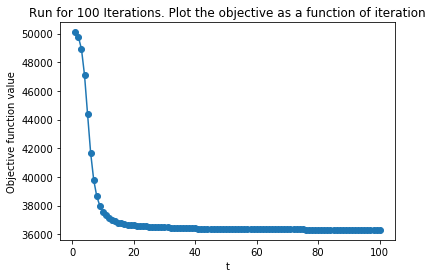

In [122]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

t = []
for i in range(1,101):
    t.append(i)
    
plot(t, one_hundred_iterations[2],'-o')



plt.title('Run for 100 Iterations. Plot the objective as a function of iteration')
plt.xlabel('t')
plt.ylabel('Objective function value')


plt.legend()

plt.show()

In [123]:
W = one_hundred_iterations[0][99]
W

matrix([[  1.42950946e+01,   2.43800928e+01,   1.54053978e+01, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  4.12453146e-93,   4.87601830e+00,   5.13266347e+00, ...,
           1.29476371e+01,   4.85196999e+00,   9.19328372e+00],
        [  1.53532523e-28,   4.87601830e+00,   6.10090394e-80, ...,
           0.00000000e+00,   4.85196942e+00,   0.00000000e+00],
        ..., 
        [  0.00000000e+00,   4.87601830e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  4.55682012e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   4.59664351e+00]])

In [124]:
W.shape

(3801, 10)

In [125]:
W_Column_Normalized = normalize(W, norm='l1', axis=0)

In [126]:
W_Column_Normalized.shape

(3801, 10)

In [127]:
W_Column_Normalized[:,0]

array([  2.38645624e-03,   6.88558850e-97,   2.56310756e-32, ...,
         0.00000000e+00,   7.60726121e-04,   0.00000000e+00])

In [128]:
W_Column_Normalized_df = pd.DataFrame(W_Column_Normalized)
W_Column_Normalized_df.columns = ['Topic 1', 'Topic 2', 'Topic 3','Topic 4','Topic 5',
                                 'Topic 6', 'Topic 7', 'Topic 8','Topic 9','Topic 10']

In [129]:
W_Column_Normalized_df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
0,2.386456e-03,4.589953e-03,3.188797e-03,2.825833e-03,8.576616e-04,0.000000e+00,7.324572e-04,0.000000,0.000000,0.000000e+00
1,6.885588e-97,9.179905e-04,1.062421e-03,3.233257e-03,1.715736e-03,2.442844e-03,0.000000e+00,0.002115,0.000882,1.625652e-03
2,2.563108e-32,9.179905e-04,1.262840e-83,7.590813e-04,8.576617e-04,8.913651e-04,0.000000e+00,0.000000,0.000882,0.000000e+00
3,0.000000e+00,0.000000e+00,0.000000e+00,7.590813e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
4,0.000000e+00,1.835981e-03,0.000000e+00,7.943946e-72,0.000000e+00,2.232765e-92,0.000000e+00,0.008460,0.000000,6.807559e-17
5,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.576616e-04,0.000000e+00,0.000000e+00,0.000000,0.000000,1.312693e-39
6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.639456e-26,0.000000e+00,0.001410,0.000000,0.000000e+00
7,7.607261e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
8,1.045946e-64,0.000000e+00,0.000000e+00,1.518163e-03,0.000000e+00,1.026259e-19,0.000000e+00,0.000000,0.000000,0.000000e+00
9,1.521452e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00


In [130]:
def get_word_weight(topic, W_Column_Normalized_df,Word_df):
    Topic_02 = W_Column_Normalized_df[[topic]]

    Topic_02_sorted = Topic_02.sort([topic], ascending=False)
    Topic_02_sorted_first10 = Topic_02_sorted.iloc[0:15]

    Topic_02_sorted_first10.reset_index(level=0, inplace=True)

    topic2_word_list = []
    for i in range(0,15):
        word = Word_df.iloc[Topic_02_sorted_first10.iloc[:,0][i],1]
        topic2_word_list.append(word)

    topic2_final_value = []
    for i in range(0,15):
        value = (topic2_word_list[i], Topic_02_sorted_first10.iloc[i][1])
        topic2_final_value.append(value)
    
    Topic2_final = pd.DataFrame(topic2_final_value)

    Topic2_final.columns = [ topic + ' Words', 'weight']

    Topic2_final= Topic2_final.reset_index(drop=True)

    Topic2_final.index = Topic2_final.index + 1
    return  Topic2_final
    

In [131]:
topic1 = get_word_weight('Topic 1', W_Column_Normalized_df,Word_df)
topic1



//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


IndexError: single positional indexer is out-of-bounds

In [132]:
topic2 = get_word_weight('Topic 2', W_Column_Normalized_df,Word_df)
topic2

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Topic 2 Words,weight
1,film,0.036937
2,movie,0.031952
3,great,0.017071
4,time,0.011521
5,good,0.010988
6,animated,0.010098
7,titanic,0.009180
8,story,0.008569
9,funny,0.008128
10,movies,0.008075


In [133]:
topic3 = get_word_weight('Topic 3', W_Column_Normalized_df,Word_df)
topic4 = get_word_weight('Topic 4', W_Column_Normalized_df,Word_df)
topic5 = get_word_weight('Topic 5', W_Column_Normalized_df,Word_df)

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [134]:
row1 = pd.concat([topic1, topic2,topic3,topic4,topic5],axis =1)

In [135]:
row1

,Topic 1 Words,weight,Topic 2 Words,weight,Topic 3 Words,weight,Topic 4 Words,weight,Topic 5 Words,weight
1,movie,0.023570,film,0.036937,film,0.032402,movie,0.041715,movie,0.070924
2,film,0.020796,movie,0.031952,movie,0.019342,love,0.016912,bean,0.016133
3,story,0.011925,great,0.017071,simba,0.018070,film,0.015718,movies,0.013538
4,family,0.011509,time,0.011521,king,0.013114,great,0.012955,great,0.012306
5,series,0.011161,good,0.010988,disney,0.013031,story,0.010948,time,0.011631
6,tv,0.009820,animated,0.010098,scar,0.010629,good,0.010071,will,0.011536
7,great,0.008641,titanic,0.009180,best,0.009852,titanic,0.009868,thing,0.011150
8,watch,0.008619,story,0.008569,great,0.009601,people,0.009157,good,0.010981
9,godfather,0.008117,funny,0.008128,films,0.009566,best,0.007375,film,0.010741
10,bean,0.007273,movies,0.008075,lion,0.008845,will,0.006747,best,0.010324


In [136]:
topic6 = get_word_weight('Topic 6', W_Column_Normalized_df,Word_df)
topic7 = get_word_weight('Topic 7', W_Column_Normalized_df,Word_df)
topic8 = get_word_weight('Topic 8', W_Column_Normalized_df,Word_df)
topic9 = get_word_weight('Topic 9', W_Column_Normalized_df,Word_df)
topic10 = get_word_weight('Topic 10', W_Column_Normalized_df,Word_df)

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [137]:
row2 = pd.concat([topic6, topic7,topic8,topic9,topic10],axis =1)

In [138]:
row2

,Topic 6 Words,weight,Topic 7 Words,weight,Topic 8 Words,weight,Topic 9 Words,weight,Topic 10 Words,weight
1,movie,0.025742,godfather,0.027059,movie,0.025017,movie,0.034954,film,0.026820
2,great,0.015096,corleone,0.024154,close,0.018330,story,0.010566,movie,0.026758
3,film,0.014192,michael,0.022651,film,0.014633,film,0.009078,bean,0.018223
4,tom,0.012782,movie,0.021344,disney,0.014171,time,0.007231,great,0.017116
5,ryan,0.011637,film,0.016278,great,0.014080,acting,0.007057,story,0.012010
6,hanks,0.011637,family,0.016076,glenn,0.013395,great,0.006616,love,0.010994
7,meg,0.010727,pacino,0.014287,good,0.012071,actors,0.006175,well,0.009516
8,best,0.009941,vito,0.012471,classic,0.011125,best,0.006073,people,0.008104
9,scene,0.009120,robert,0.012205,cruella,0.009870,love,0.006013,acting,0.007659
10,perfect,0.008834,al,0.009605,version,0.009165,well,0.005995,films,0.007636
